<a href="https://colab.research.google.com/github/ervinarosaa/Heart-Diseases-Classification/blob/main/Revisi_SC60214_Ervina_Rosa_Aulia_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING - ERVINA ROSA AULIA**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Input Dataset
data = pd.read_csv('/content/drive/MyDrive/Startup Campus/heart.csv')

In [ ]:
from importlib import reload
plt=reload(plt)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **Assignment 2**

## 1. Data Preparation

Peserta dapat memilih dataset yang telah disediakan. Siapkan data berdasarkan langkah berikut:
* Missing value: Mencari missing value dan mengatasi masalah missing value jika ada.
* Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.
* Outlier: Memeriksa outlier dan menangani outlier jika ada.
* Imbalance data: Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.
* Feature encoding: Melakukan feature encoding jika diperlukan.

### **Missing Value**

In [ ]:
# TOTAL MISSING VALUE DARI MASING-MASING KOLOM
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Tidak ada missing value pada dataset Heart Disease**\
Jika terdapat missing value dapat di handle dengan menggunakan :

1. MEAN\
`data['nama_kolom'] = data['nama_kolom'].fillna(data['nama_kolom'].mean())`

2. MEDIAN\
`data['nama_kolom'] = data['nama_kolom'].fillna(data['nama_kolom'].median())`

3. MODE\
`data['nama_kolom'] = data['nama_kolom'].fillna(data['nama_kolom'].mode()[0])`

4. DROP MISSING VALUE\
`data_new = data.dropna(subset=['nama_kolom'])`

### **Duplicate Value**

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Menghapus nilai-nilai yang duplikat
data = data.drop_duplicates()
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Informasi data terbaru
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Outlier**

In [ ]:
kolom = data.columns.values
kolom

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

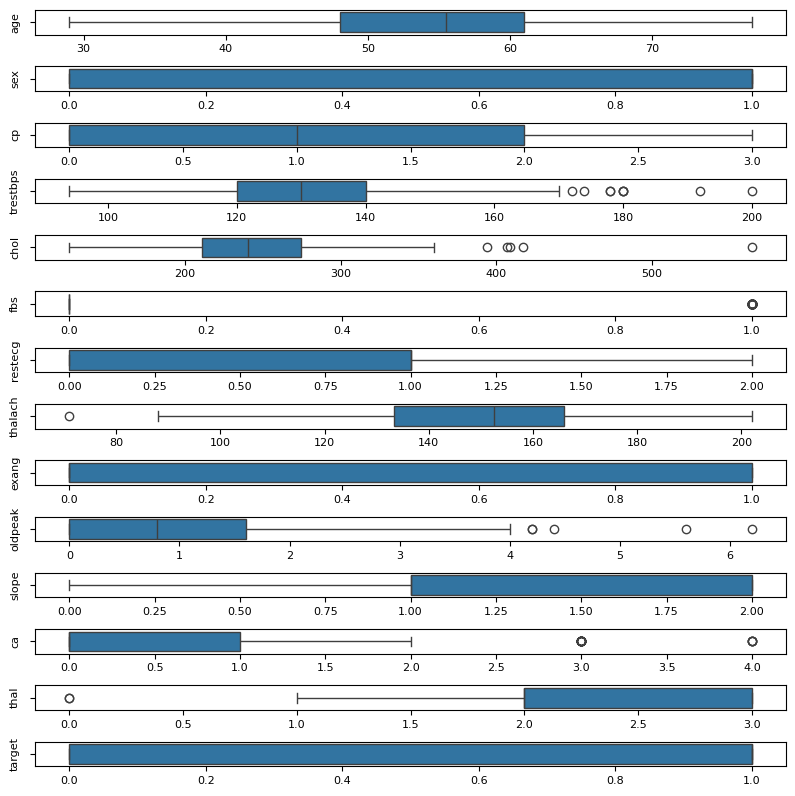

In [ ]:
plt.figure(figsize=(8,8))  # Menetapkan ukuran gambar menjadi (8, 8)
for i in range(len(kolom)):
    ax = plt.subplot(len(kolom), 1, i+1)
    sns.boxplot(data[kolom[i]], orient='h')
    ax.set_ylabel(kolom[i])  # Menetapkan label sumbu y sesuai dengan nama kolom
    ax.set_xlabel("")  # Menghilangkan label sumbu x
plt.tight_layout()
plt.show()

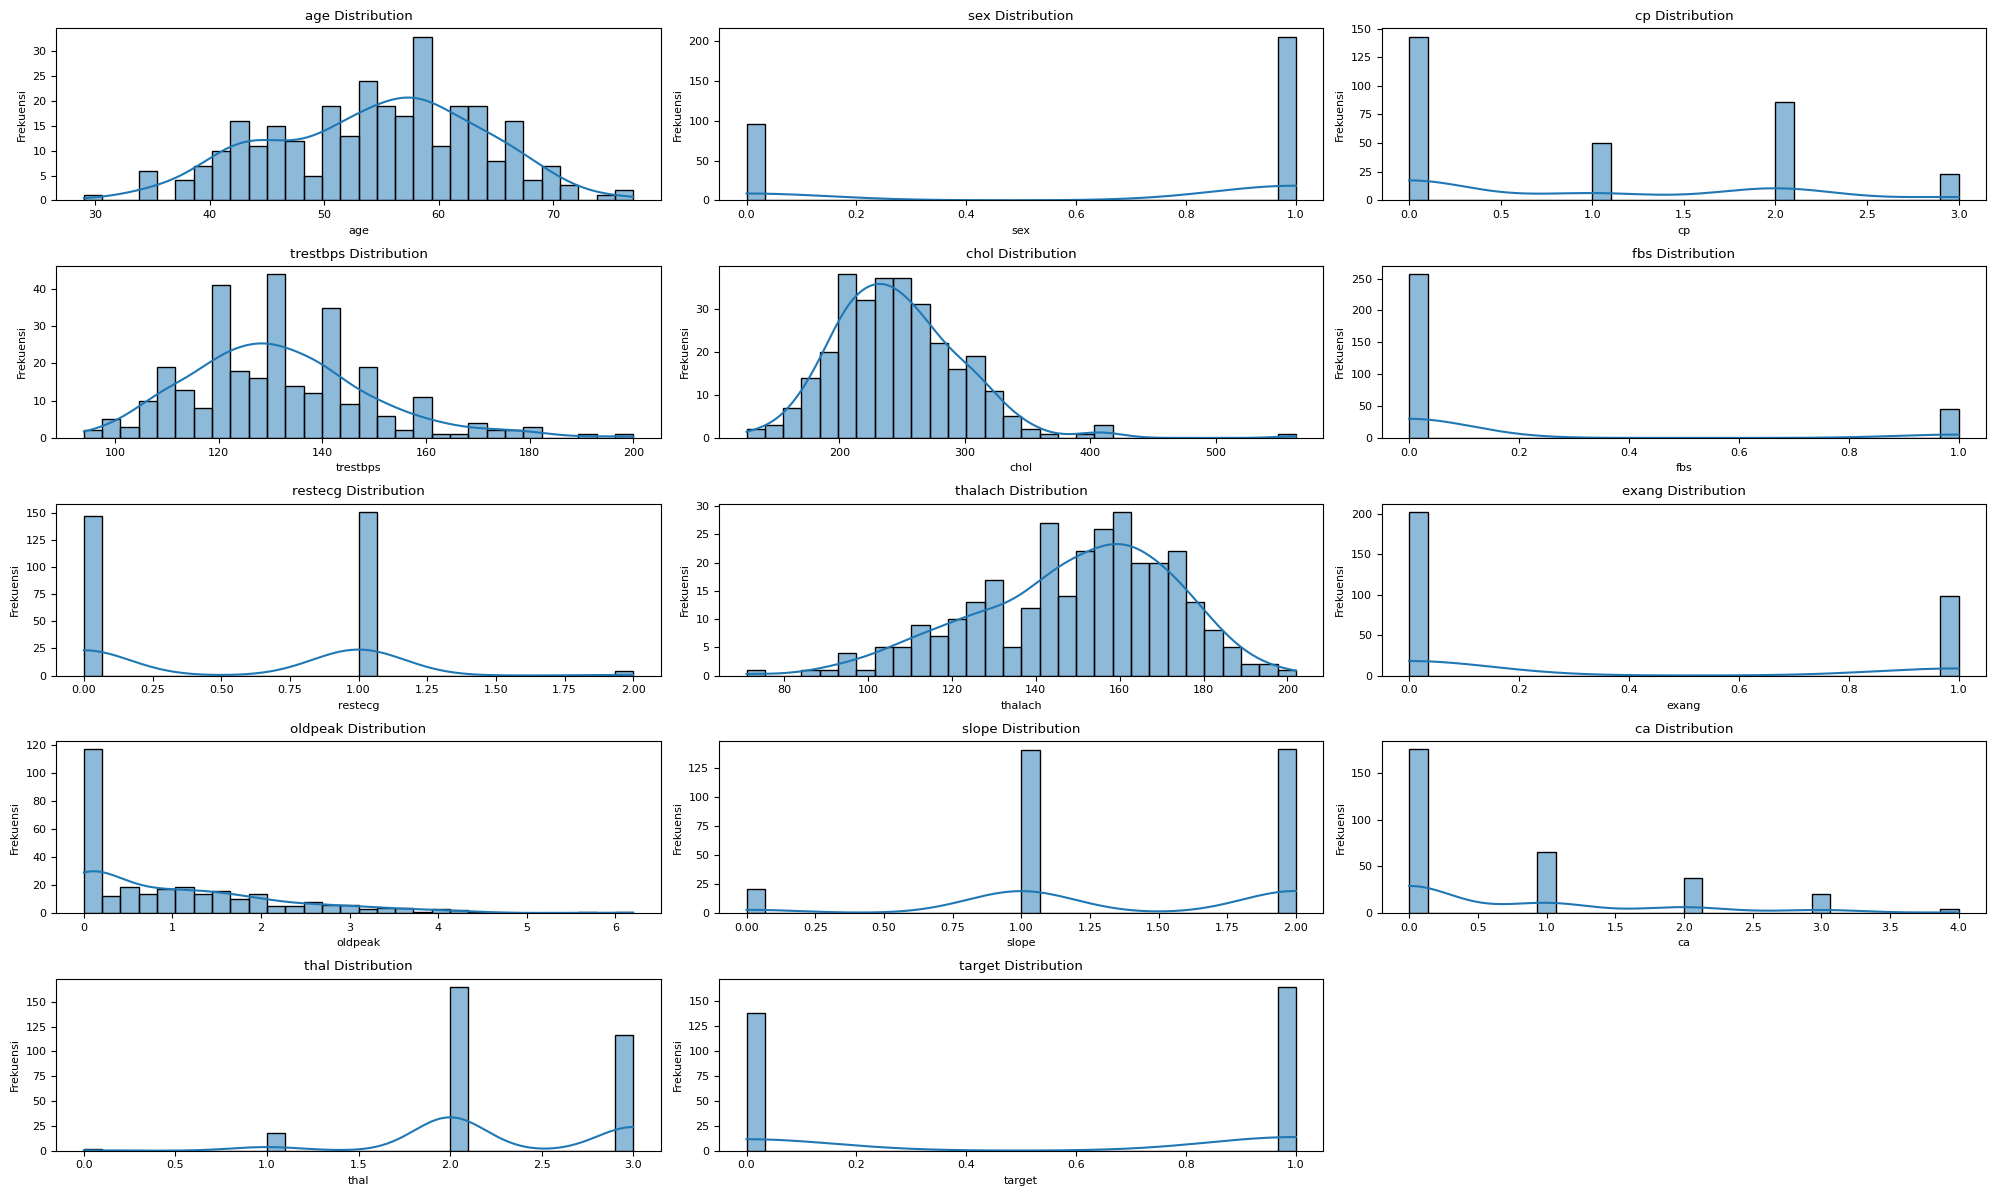

In [ ]:
plt.figure(figsize=(20, 12))  # Menyesuaikan ukuran figur

num_plots = len(kolom)

# Menghitung jumlah baris dan kolom subplot
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

# Plot data on each subplot
for i, column in enumerate(kolom):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data[column], kde=True, bins=30)

    plt.title(f'{column} Distribution')
    plt.xlabel(f'{column}')
    plt.ylabel('Frekuensi')

# Mengatur layout subplot
plt.tight_layout()
plt.show()


**KOLOM YANG PERLU HANDLING OUTLIER:**
1. trestbps
2. chol
3. thalach
4. oldpeak

In [ ]:
# copy dataframe untuk menyimpan data baru setelah handling outlier
data_new=data.copy()

##### **Handling Outlier Kolom trestbps**

In [ ]:
# MENAMPILKAN DATA YANG OUTLIER
# Menghitung IQR untuk kolom trestbps
Q1 = data['trestbps'].quantile(0.25)
Q3 = data['trestbps'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan nilai outlier dalam kolom trestbps
data_outliers_trestbps = data[(data['trestbps'] < lower_bound) | (data['trestbps'] > upper_bound)]['trestbps']
data_outliers_trestbps

29     180
47     178
87     174
137    180
151    192
175    200
343    172
396    180
528    178
Name: trestbps, dtype: int64

In [ ]:
# HANDLING OUTLIER DENGAN MEAN
data_trestbps_new = data['trestbps'].copy()

# Menghitung median dari kolom tersebut
mean = data_trestbps_new.mean()
data_trestbps_new.loc[(data_trestbps_new < lower_bound) | (data_trestbps_new > upper_bound)] = mean

# Mengganti value di data_new
data_new['trestbps'] = data_trestbps_new
data_new['trestbps']

0      125.0
1      140.0
2      145.0
3      148.0
4      138.0
       ...  
723    120.0
733    108.0
739    128.0
843    160.0
878    120.0
Name: trestbps, Length: 302, dtype: float64

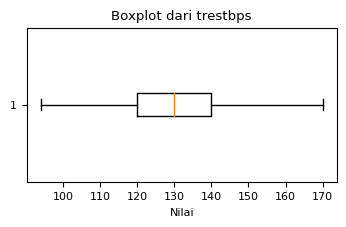

In [ ]:
# Outlier kolom trestbps
plt.figure(figsize=(4, 2))
plt.boxplot(data_new['trestbps'], vert=False)
plt.title('Boxplot dari trestbps')
plt.xlabel('Nilai')
plt.show()

##### **Handling Outlier Kolom chol**

In [ ]:
# MENAMPILKAN DATA YANG OUTLIER
# Menghitung IQR untuk kolom chol
Q1 = data['chol'].quantile(0.25)
Q3 = data['chol'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan nilai outlier dalam kolom chol
data_outliers_chol = data[(data['chol'] < lower_bound) | (data['chol'] > upper_bound)]['chol']
data_outliers_chol

123    417
158    564
179    409
255    394
450    407
Name: chol, dtype: int64

In [ ]:
# HANDLING OUTLIER DENGAN MEAN
data_chol_new = data['chol'].copy()

# Menghitung median dari kolom tersebut
mean = data_chol_new.mean()
data_chol_new.loc[(data_chol_new < lower_bound) | (data_chol_new > upper_bound)] = mean

# Mengganti value di data_new
data_new['chol'] = data_chol_new
data_new['chol']

0      212.0
1      203.0
2      174.0
3      203.0
4      294.0
       ...  
723    211.0
733    141.0
739    255.0
843    273.0
878    188.0
Name: chol, Length: 302, dtype: float64

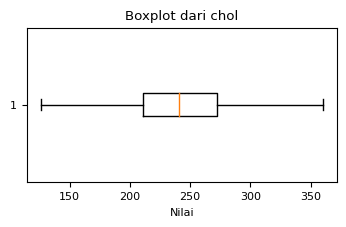

In [ ]:
plt.figure(figsize=(4, 2))
plt.boxplot(data_new['chol'], vert=False)
plt.title('Boxplot dari chol')
plt.xlabel('Nilai')
plt.show()

##### **Handling Outlier Kolom thalach**

In [ ]:
# MENAMPILKAN DATA YANG OUTLIER
# Menghitung IQR untuk kolom thalach
Q1 = data['thalach'].quantile(0.25)
Q3 = data['thalach'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan nilai outlier dalam kolom thalach
data_outliers_thalach = data[(data['thalach'] < lower_bound) | (data['thalach'] > upper_bound)]['thalach']
data_outliers_thalach

267    71
Name: thalach, dtype: int64

In [ ]:
# HANDLING OUTLIER DENGAN MEDIAN
data_thalach_new = data['thalach'].copy()

# Menghitung median dari kolom tersebut
median = data_thalach_new.median()
data_thalach_new.loc[(data_thalach_new < lower_bound) | (data_thalach_new > upper_bound)] = median

# Mengganti value di data_new
data_new['thalach'] = data_thalach_new
data_new['thalach']

0      168.0
1      155.0
2      125.0
3      161.0
4      106.0
       ...  
723    115.0
733    175.0
739    161.0
843    125.0
878    113.0
Name: thalach, Length: 302, dtype: float64

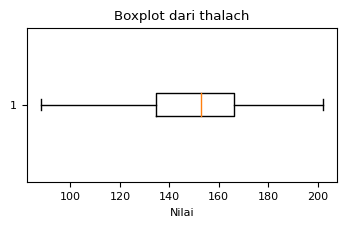

In [ ]:
# Outlier kolom thalach
outlier_thalach = 'thalach'
plt.figure(figsize=(4, 2))
plt.boxplot(data_thalach_new, vert=False)
plt.title('Boxplot dari ' + outlier_thalach)
plt.xlabel('Nilai')
plt.show()

##### **Handling Outlier Kolom oldpeak**

In [ ]:
# MENAMPILKAN DATA YANG OUTLIER
# Menghitung IQR untuk kolom oldpeak
Q1 = data['oldpeak'].quantile(0.25)
Q3 = data['oldpeak'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan nilai outlier dalam kolom oldpeak
data_outliers_oldpeak = data[(data['oldpeak'] < lower_bound) | (data['oldpeak'] > upper_bound)]['oldpeak']
data_outliers_oldpeak

6      4.4
13     4.2
54     5.6
69     6.2
528    4.2
Name: oldpeak, dtype: float64

In [ ]:
# HANDLING OUTLIER DENGAN MEDIAN
data_oldpeak_new = data['oldpeak'].copy()

# Menghitung median dari kolom tersebut
median = data_oldpeak_new.median()
data_oldpeak_new.loc[(data_oldpeak_new < lower_bound) | (data_oldpeak_new > upper_bound)] = median

# Mengganti value di data_new
data_new['oldpeak'] = data_oldpeak_new
data_new['oldpeak']

0      1.0
1      3.1
2      2.6
3      0.0
4      1.9
      ... 
723    1.5
733    0.6
739    0.0
843    0.0
878    1.4
Name: oldpeak, Length: 302, dtype: float64

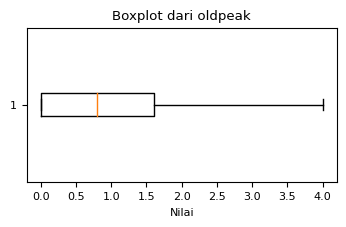

In [ ]:
# Outlier kolom oldpeak
outlier_oldpeak = 'oldpeak'
plt.figure(figsize=(4, 2))
plt.boxplot(data_oldpeak_new, vert=False)
plt.title('Boxplot dari ' + outlier_oldpeak)
plt.xlabel('Nilai')
plt.show()

##### **Boxplot setelah handling outlier**

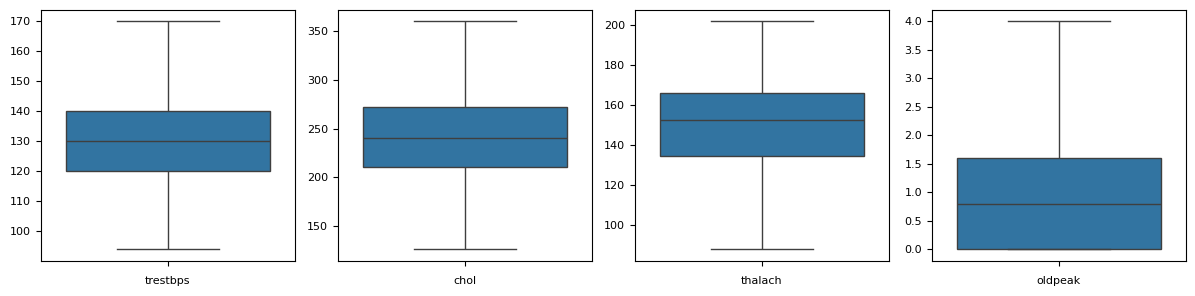

In [ ]:
kolom_outlier = ['trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(12, 3))  # Menetapkan ukuran gambar menjadi (12, 3) untuk membuat 4 kolom dengan 1 baris
for i in range(len(kolom_outlier)):
    ax = plt.subplot(1, 4, i+1)  # Menetapkan subplot ke (1, 4)
    sns.boxplot(data_new[kolom_outlier[i]], orient='v')  # Menggunakan orient='v' untuk membuat boxplot secara vertikal
    ax.set_xlabel(kolom_outlier[i])  # Menetapkan label sumbu y sesuai dengan nama kolom
    ax.set_ylabel("")  # Menghilangkan label sumbu x
plt.tight_layout()
plt.show()

In [ ]:
data_new.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


### **Imbalance Data**

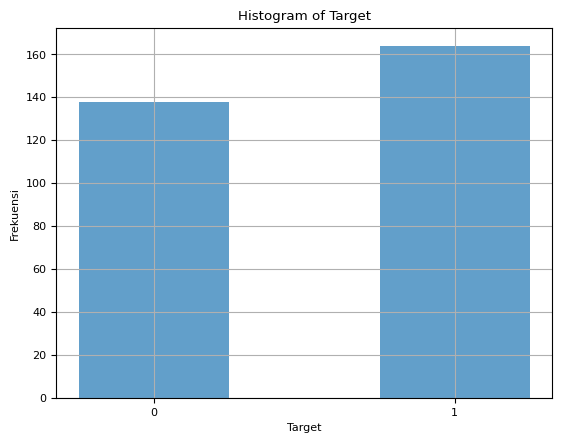

In [ ]:
# Membuat histogram dari kolom 'target'
plt.hist(data_new['target'], bins=[-0.25, 0.25, 0.75, 1.25], alpha=0.7)
plt.title('Histogram of Target')
plt.xlabel('Target')
plt.ylabel('Frekuensi')
plt.xticks([0, 1])
plt.grid(True)
plt.show()

In [ ]:
# Jumlah target setiap kelas
class_count = data_new['target'].value_counts()
class_count

target
1    164
0    138
Name: count, dtype: int64

**Tidak diperlukan handling imblance data karena selisih dari kelas data tidak lebih dari 50%**\
Namun, jika ingin melakukan imbalace data bisa menggunakan cara berikut :

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Memisahkan fitur dan target
X = data_new.drop('target', axis=1)
y = data_new['target']

# Oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan distribusi kelas setelah oversampling
print("Distribusi kelas setelah oversampling:")
print(pd.Series(y_resampled).value_counts())

Distribusi kelas setelah oversampling:
target
0    164
1    164
Name: count, dtype: int64


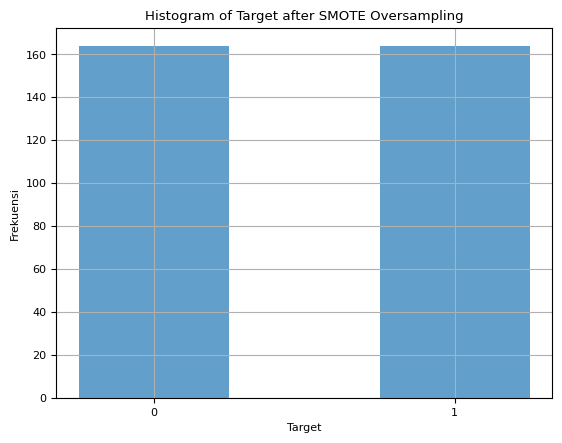

In [ ]:
# Membuat histogram
plt.hist(y_resampled, bins=[-0.25, 0.25, 0.75, 1.25], alpha=0.7)
plt.title('Histogram of Target after SMOTE Oversampling')
plt.xlabel('Target')
plt.ylabel('Frekuensi')
plt.xticks([0, 1])
plt.grid(True)
plt.show()

### **Feature Encoding**

**Feature encoding tidak diperlukan karena value pada dataset heart disease sudah dalam bentuk numerik semua**\
Namun, jika terdapat data kategori. Misalnya pada kolom 'thal' bernilai kategori dengan unique value normal, fixed defect, dan reversable. Maka, dapat dilakukan feature encoding dengan metode label encoding seperti berikut :

```
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Mengambil nilai uni dari kolom
unique_thal = data_new['thal'].unique()

# Mapping
thal_mapping = {thal: idx+1 for idx, thal in enumerate(unique_thal)}

data_thal_label_encoded = encoder.fit_transform(data_new['thal'].map(thal_mapping))
```



## 2. Exploratory Data Analysis (EDA)

Menggunakan dataset yang sama, Peserta diminta untuk:
* Mengelaborasi features dan tipe data (nominal, ordinal, numerical)
* Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus
* Menemukan dan mendeskripsikan statistical five summaries
* Mendeskripsikan distribusi data

In [ ]:
data_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


In [ ]:
plt=reload(plt)

### **Mengelaborasi Tipe Data**

In [ ]:
data_new.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Tipe data berdasarkan value pada dataset heart disease :**

In [ ]:
tipe_data_kategori = []
tipe_data_numerik = []
tipe_data_ordinal = []

for column in data_new.columns:
    if data_new[column].dtype == 'object':
      tipe_data_kategori.append(column)
    elif all(isinstance(value, int) for value in data_new[column].unique()):
      tipe_data_ordinal.append(column)
    else:
        tipe_data_numerik.append(column)

print(f"Tipe data kategori:{tipe_data_kategori}")
print(f"Tipe data numerik :{tipe_data_numerik}")
print(f"Tipe data ordinal :{tipe_data_ordinal}")

Tipe data kategori:[]
Tipe data numerik :['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Tipe data ordinal :[]


### **Perbedaan Penggunaan Mean, Median, Modus**

##### **Mean**

**Kondisi Penggunaan:**
* Mean digunakan untuk menggambarkan pusat dari suatu data
* Cocok digunakan pada saat data memiliki distribusi normal atau mendekati normal (grafik berbentuk lonceng)
* Rentan terpengaruh terhadap outlier karena dalam beberapa kasus, nilai dara-rata tidak bisa mempresentasikan nilai jika ada outlier, oleh karena itu tidak terlalu disarankan untuk menggunakan mean dalam handling outlier
* Cocok digunakan untuk handling missing value ketika hanya memiliki terdapat sedikit missing value dengan data numerik yang kontinu

In [ ]:
# Contoh Penggunaan Mean
Mean = data_new['age'].mean()
print(f"Mean dari age adalah {Mean}")

Mean dari age adalah 54.420529801324506


##### **Median**

**Kondisi Penggunaan:**
* Median digunakan untuk menemukan nilai tengah yang tidak dipengaruhi oleh outlier
* Cocok digunakan untuk handling missing value ketika data memiliki skewness atau distribusi data yang tidak simetris
* Tahan terhadap outlier atau nilai ekstrem, sehingga untuk handling outlier disarankan untuk menggunakan median

In [ ]:
# Contoh Penggunaan Median
Median = data_new['age'].median()
print(f"Median dari age adalah {Median}")

Median dari age adalah 55.5


##### **Modus**

**Kondisi Penggunaan:**
* Modus digunakan untuk mencari nilai yang paling sering muncul dalam kumpulan data
* Cocok digunakan ketika ingin mengetahui nilai yang paling dominan dalam data
* Modus sering digunakan untuk melakukan handling missing value dan handling outlier dalam data kategorikal dan data ordinal

In [ ]:
# Contoh Penggunaan Modus
Mode = data_new['age'].mode()
print(f"Modus dari age adalah {Mode}")

Modus dari age adalah 0    58
Name: age, dtype: int64


### **Statistical Five Summaries**

In [ ]:
data_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.113986,243.326159,0.149007,0.526490,149.839404,0.327815,0.974834,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,15.150759,44.623345,0.356686,0.526027,22.450348,0.470196,1.041288,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.750000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,272.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


### **Distribusi Data**

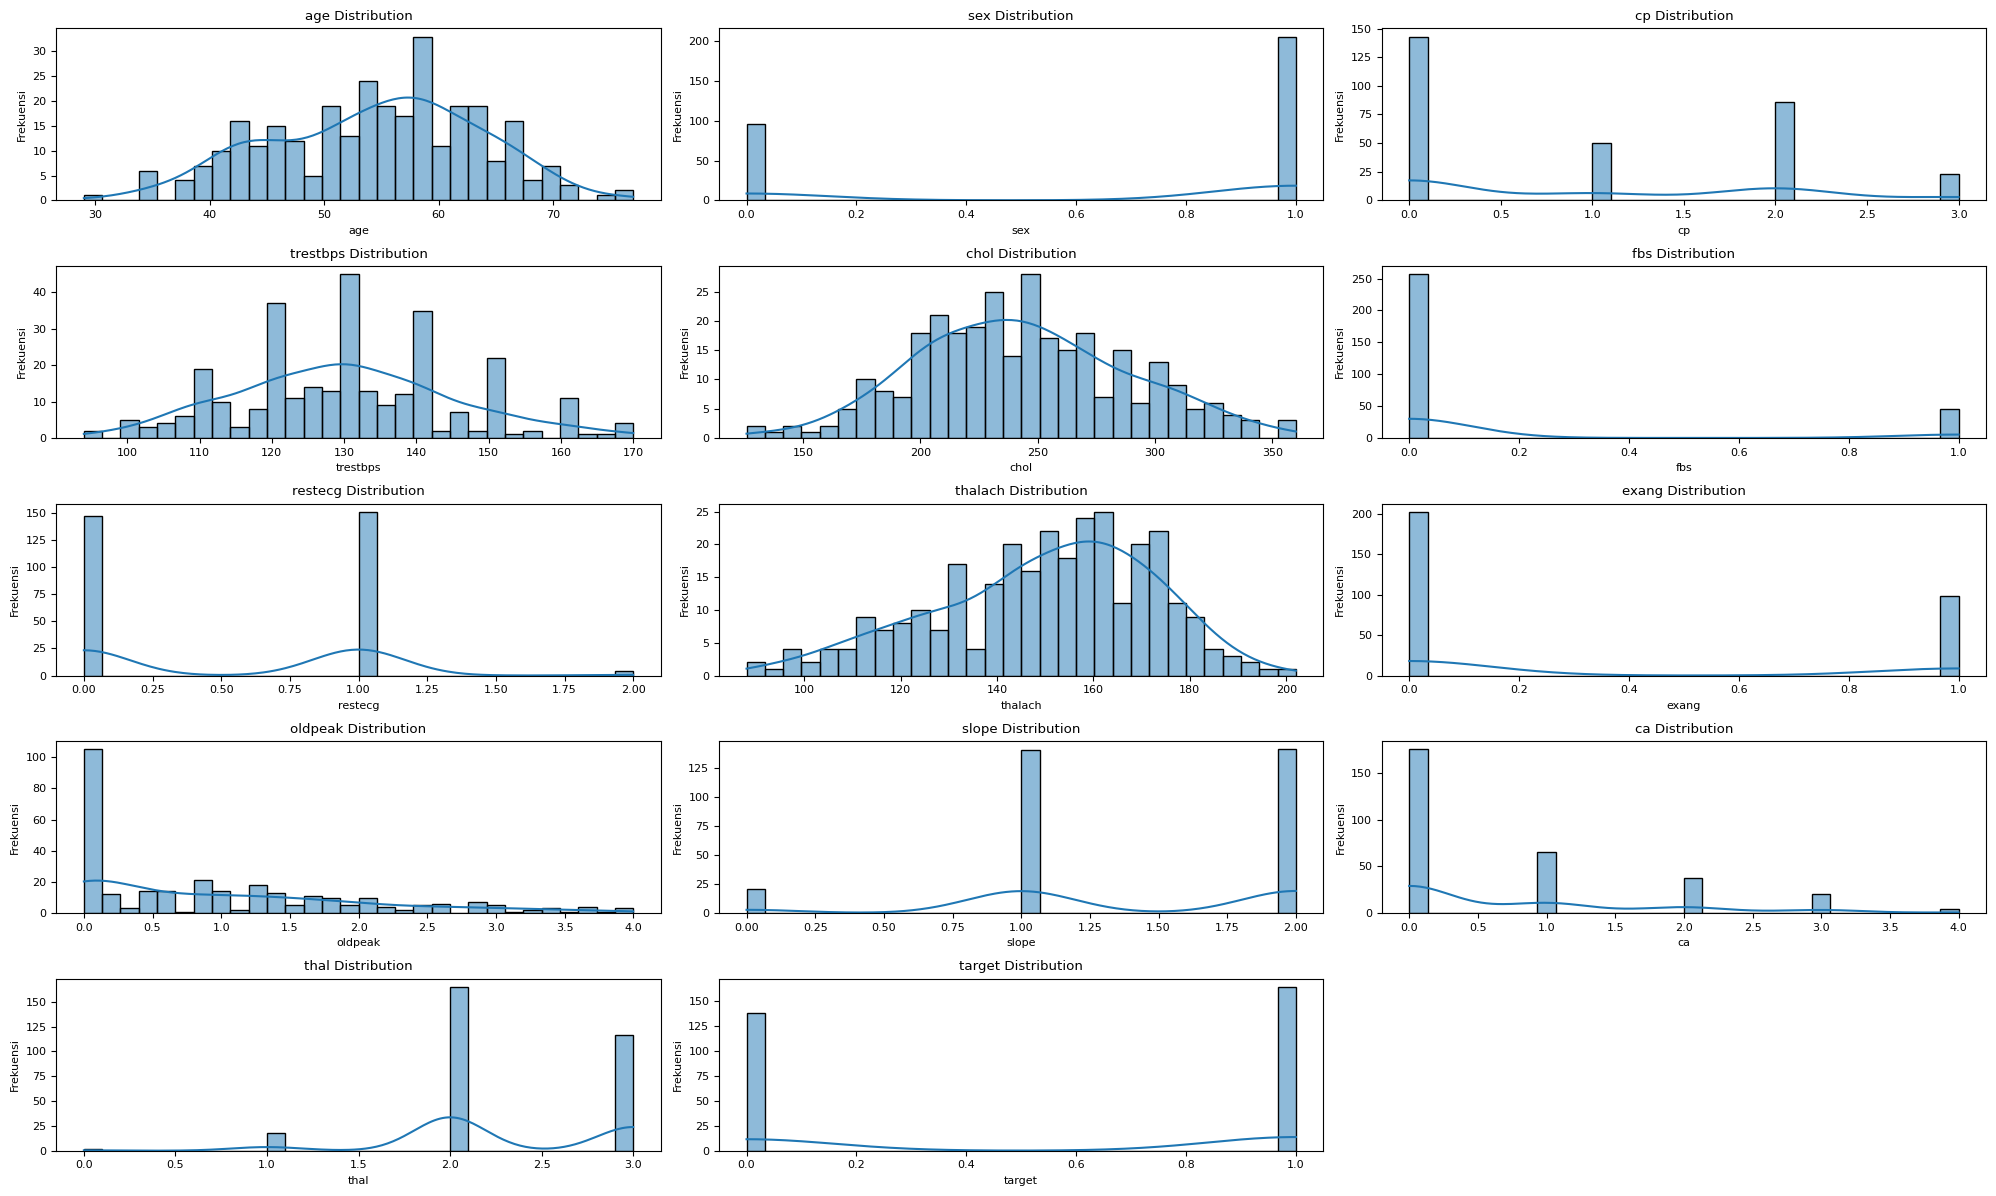

In [ ]:
plt.figure(figsize=(20, 12))  # Menyesuaikan ukuran figur

num_plots = len(data_new.columns)

# Menghitung jumlah baris dan kolom subplot
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

# Plot data on each subplot
for i, column in enumerate(data_new.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data_new[column], kde=True, bins=30)

    plt.title(f'{column} Distribution')
    plt.xlabel(f'{column}')
    plt.ylabel('Frekuensi')

# Mengatur layout subplot
plt.tight_layout()
plt.show()

### **Visualisasi Hubungan feature dengan target**

##### **Hubungan antara Age dengan Heart Disease**

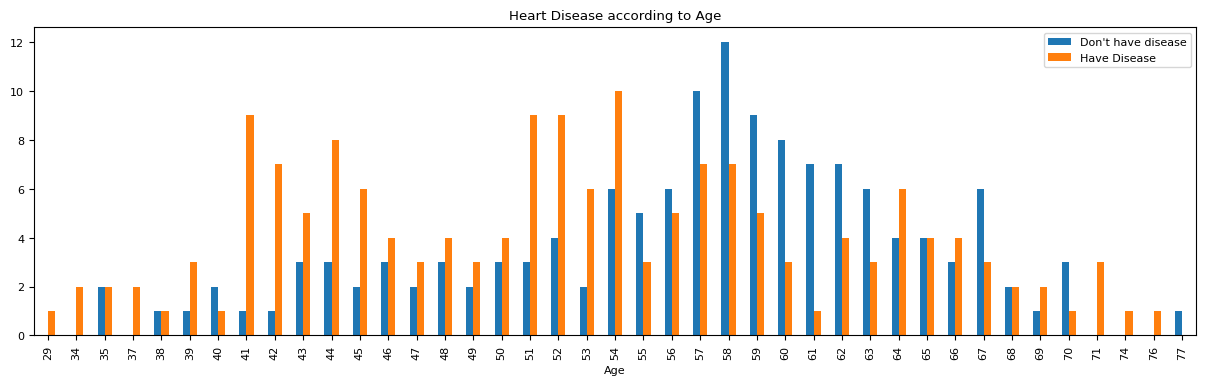

In [ ]:
# Hubungan umur dengan penyakit jantung
pd.crosstab(data_new.age, data_new.target).plot(kind="bar", figsize=(15,4))
plt.title("Heart Disease according to Age")
plt.ylabel=("Total")
plt.xlabel("Age")
plt.legend(["Don't have disease", "Have Disease"])
plt.show()


##### **Hubungan antara Gender dengan Target**

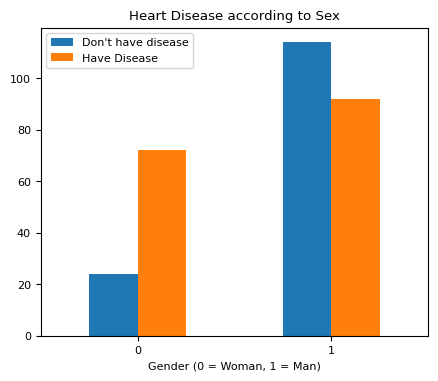

In [ ]:
# Hubungan antara gender dengan taget
pd.crosstab(data_new.sex, data_new.target).plot(kind="bar", figsize=(5,4))
plt.title("Heart Disease according to Sex")
plt.ylabel=("Total")
plt.xlabel("Gender (0 = Woman, 1 = Man)")
plt.legend(["Don't have disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()

**Hubungan antara gender dengan target**\
Perbandingan perempuan yang mengalami risiko penyakit jantung lebih banyak dibandingkan yang tidak mengalami risiko penyakit jantung. Sedangkan perbandingan pada laki-laki, lebih banyak yang tidak mengalami risiko penyakit jantung dibangdingkan dengan yang mengalami risiko penyakit jantung

##### **Hubungan antara CP dengan Target**

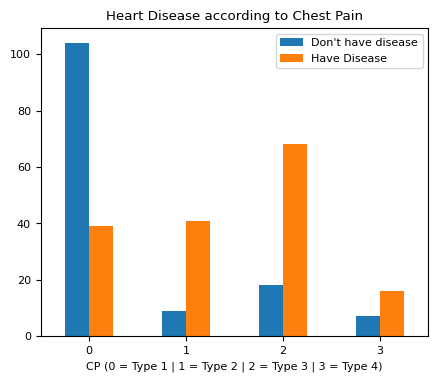

In [ ]:
# Hubungan antara cp dengan taget
pd.crosstab(data_new.cp, data_new.target).plot(kind="bar", figsize=(5,4))
plt.title("Heart Disease according to Chest Pain")
plt.ylabel=("Total")
plt.xlabel("CP (0 = Type 1 | 1 = Type 2 | 2 = Type 3 | 3 = Type 4)")
plt.legend(["Don't have disease", "Have Disease"])
plt.xticks(rotation=0)
plt.show()

**Hubungan antara cp dengan target**\
Berdasarkan jumlah individu yang mengalami risiko penyakit jantung tertinggi dapat diurutkan menjadi individu dengan cp tipe 3, cp tipe 2, cp tipe 1, dan cp tipe 4.

Berdasarkan jumlah individu yang tidak mengalami risiko penyakit jantung dapat diurutkan (tinggi ke rendah) : cp tipe 1, cp tipe 3, cp tipe 2, dan cp tipe 4

##### **Grafik Hubungan antara Feature Lainnya dengan Target**

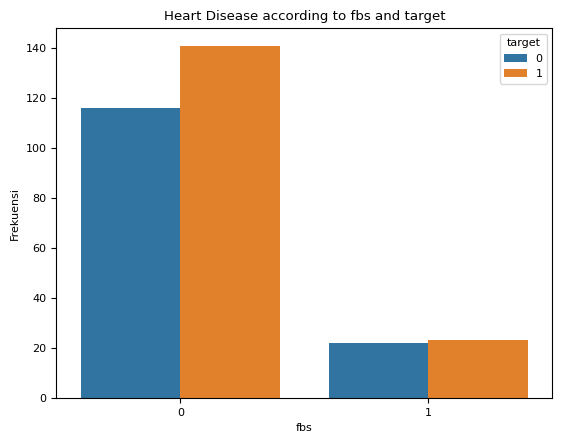

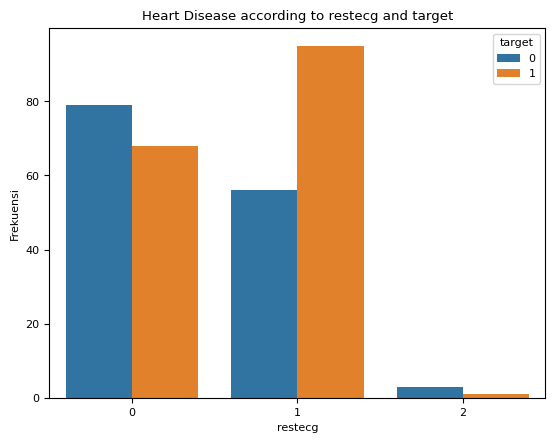

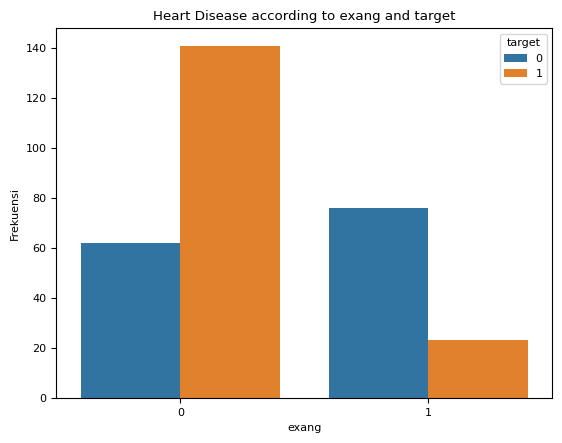

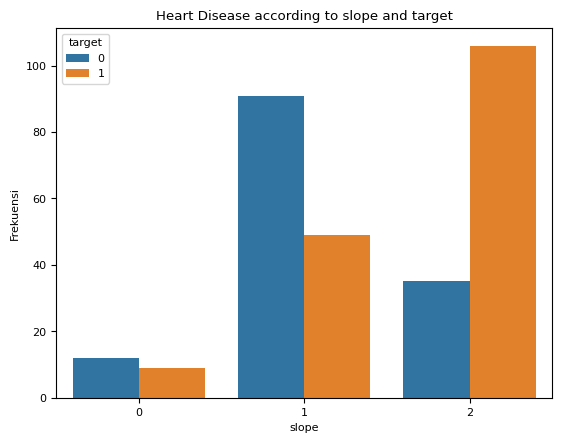

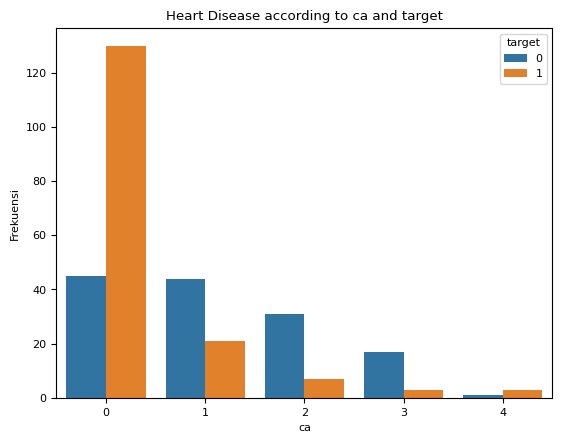

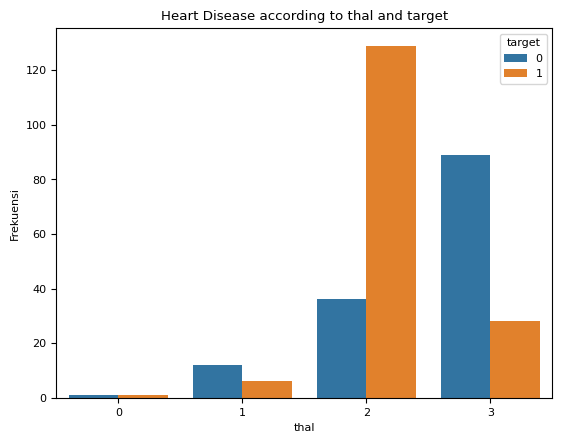

In [ ]:
plt=reload(plt)

# list variabel untuk membuat scatter plot
numerical_features = ['fbs','restecg', 'exang','slope', 'ca', 'thal']

# Membuat Scatter plot
for feature in numerical_features:
  sns.countplot(x=feature, hue='target', data=data_new)
  plt.title(f"Heart Disease according to {feature} and target")
  plt.ylabel("Frekuensi")
  plt.xticks(rotation=0)
  plt.show()

## 3. Feature Engineering

Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membuat langkah preventif untuk mengurangi dampak dari heart disease tersebut.
Masalah/objective yang ingin diselesaikan/dicapai diserahkan kepada Peserta untuk dapat mencari permasalahan yang menurut Peserta paling penting.

In [ ]:
# Independen columns
X = data_new.drop('target', axis=1)
y = data_new['target']
print(f"Kolom X : {X.columns}")
print(f"Kolom y : 'target'")

Kolom X : Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Kolom y : 'target'


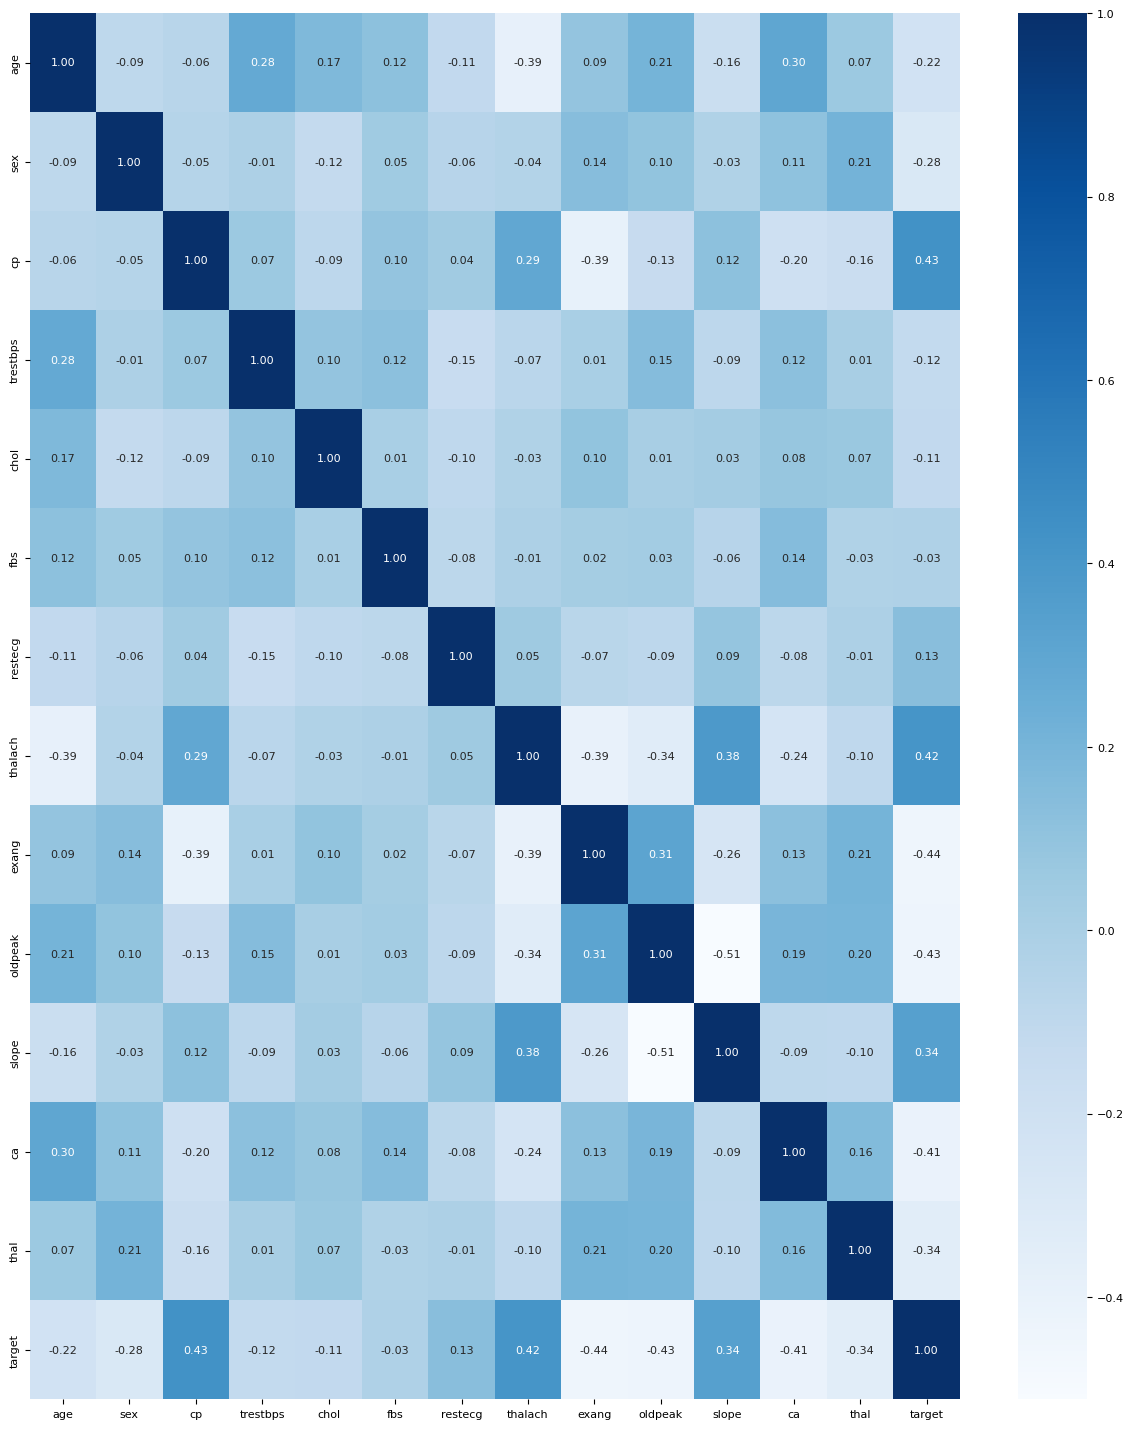

In [ ]:
corr = data_new.corr()

plt.figure(figsize=(15,18))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.rcParams['font.size']=8
plt.show()

In [ ]:
data_new.corr()['target'].sort_values()

exang      -0.435601
oldpeak    -0.428879
ca         -0.408992
thal       -0.343101
sex        -0.283609
age        -0.221476
trestbps   -0.121682
chol       -0.111607
fbs        -0.026826
restecg     0.134874
slope       0.343940
thalach     0.415306
cp          0.432080
target      1.000000
Name: target, dtype: float64

In [ ]:
plt=reload(plt)

### **Menambahkan Feature**

In [ ]:
df=data_new.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

#### **1. Menambahkan Feature age_group**

Membuat rentang umur untuk mengelompokan umur dan melihat hubungan rentang umur tersebut dengan target

In [ ]:
def age_group(row):
    if row["age"] < 30:
        return "Adolescent"
    elif 30 <= row["age"] < 45:
        return "Young Adult"
    elif 45 <= row["age"] < 60:
        return "Middle-aged Adult"
    else:
        return "Elderly"

# Definisi label yang diinginkan
label_mapping = {
    "Adolescent": 0,
    "Young Adult": 1,
    "Middle-aged Adult": 2,
    "Elderly": 3
}

# Membuat DataFrame baru untuk hasil fungsi Vascular Health Status
df_age_group_a = pd.DataFrame(df.apply(age_group, axis=1), columns=['age_group'])

# Inisialisasi label encoder dengan label yang diinginkan
encoder_age_group = LabelEncoder()

# Fit transform pada data Vascular Health Status dengan label yang diinginkan
age_group_encoded = encoder_age_group.fit_transform(df_age_group_a['age_group'])

# Menggabungkan df_diet_pattern_a dan physical_activity_encoded
merged_df_age_group = pd.concat([df_age_group_a, pd.Series(df_age_group_a['age_group'].map(label_mapping), name='age_group_encoded')], axis=1)

# Menampilkan DataFrame hasil penggabungan
print(merged_df_age_group.head(5))


           age_group  age_group_encoded
0  Middle-aged Adult                  2
1  Middle-aged Adult                  2
2            Elderly                  3
3            Elderly                  3
4            Elderly                  3


In [ ]:
# Menambahkan ke df setelah kolom age
df.insert(1, 'age_group', merged_df_age_group["age_group_encoded"])

# Menampilkan DataFrame dengan kolom 'age' dan 'age_group'
print(df.head(5))

   age  age_group  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  \
0   52          2    1   0     125.0  212.0    0        1    168.0      0   
1   53          2    1   0     140.0  203.0    1        0    155.0      1   
2   70          3    1   0     145.0  174.0    0        1    125.0      1   
3   61          3    1   0     148.0  203.0    0        1    161.0      0   
4   62          3    0   0     138.0  294.0    1        1    106.0      0   

   oldpeak  slope  ca  thal  target  
0      1.0      2   2     3       0  
1      3.1      0   0     3       0  
2      2.6      0   0     3       0  
3      0.0      2   1     3       0  
4      1.9      1   3     2       0  


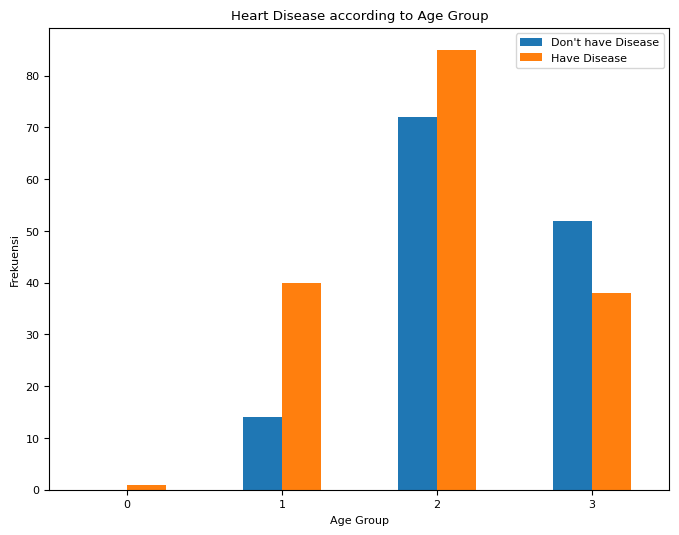

In [ ]:
# Plot crosstab dengan grafik batang
crosstab_result = pd.crosstab(df['age_group'], df['target'])

# Sortir nilai-nilai unik dalam kolom 'age_group' secara ascending
sorted_age_groups = df['age_group'].unique()
sorted_age_groups.sort()

# plotting
ax = crosstab_result.plot(kind="bar", figsize=(8, 6))

plt.title("Heart Disease according to Age Group")
plt.xlabel("Age Group")
plt.ylabel("Frekuensi")
plt.xticks(range(len(sorted_age_groups)), sorted_age_groups, rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

Berdasarkan rentang umur, individu pada rentang umur Middle-aged Adult lebih banyak yang berisiko terkena penyakit jantung

#### **2. Menambahkan Feature bpc (Blood Pressure Category)**

Blood Pressure Category digunakan untuk mengelompokkan data dengan memberikan labeling hipotensi, normal, dan hipertensi berdasarkan data yang ada di dataset dengan rentang :
* trestbps < 120 : Normal
* 120 <= trestbps < 140 : Prehypertention
* 140 <= trestbps < 160 : Hypertention Stage 1
* trestbps >= 160 : Hypertention Stage 2

**Note:**\
Pada dataset tidak ada nilai trestbps < 90, sehingga labeling yang muncul hanya untuk kategori normal dan hipertensi

In [ ]:
def blood_pressure_category(row):
    if (row['trestbps'] < 120):
        return "Normal"
    elif (120 <= row['trestbps'] < 140):
        return "Prehypertention"
    elif (140 <= row['trestbps'] < 160):
        return "Hypertention Stage 1"
    elif (row['trestbps'] >= 160):
        return "Hypertention Stage 2"
    else:
        return "Undefined"

# Definisi label yang diinginkan
label_mapping = {
    "Normal": 0,
    "Prehypertention": 1,
    "Hypertention Stage 1": 2,
    "Hypertention Stage 2": 3
}

# Membuat DataFrame baru untuk hasil fungsi Vascular Health Status
df_bpsc_a = pd.DataFrame(df.apply(blood_pressure_category, axis=1), columns=['bpsc'])

# Inisialisasi label encoder dengan label yang diinginkan
encoder_bpsc = LabelEncoder()

# Fit transform pada data Vascular Health Status dengan label yang diinginkan
bpsc_encoded = encoder_bpsc.fit_transform(df_bpsc_a['bpsc'])

# Menggabungkan df_diet_pattern_a dan physical_activity_encoded
merged_df_bpsc = pd.concat([df_bpsc_a, pd.Series(df_bpsc_a['bpsc'].map(label_mapping), name='bpsc_encoded')], axis=1)

# Menampilkan DataFrame hasil penggabungan
print(merged_df_bpsc.head(5))


                   bpsc  bpsc_encoded
0       Prehypertention             1
1  Hypertention Stage 1             2
2  Hypertention Stage 1             2
3  Hypertention Stage 1             2
4       Prehypertention             1


In [ ]:
# Menambahkan ke df setelah kolom trestbps
df.insert(5, 'bpsc', merged_df_bpsc["bpsc_encoded"])

# Menampilkan DataFrame dengan kolom 'bpsc'
print(df.head(5))

   age  age_group  sex  cp  trestbps  bpsc   chol  fbs  restecg  thalach  \
0   52          2    1   0     125.0     1  212.0    0        1    168.0   
1   53          2    1   0     140.0     2  203.0    1        0    155.0   
2   70          3    1   0     145.0     2  174.0    0        1    125.0   
3   61          3    1   0     148.0     2  203.0    0        1    161.0   
4   62          3    0   0     138.0     1  294.0    1        1    106.0   

   exang  oldpeak  slope  ca  thal  target  
0      0      1.0      2   2     3       0  
1      1      3.1      0   0     3       0  
2      1      2.6      0   0     3       0  
3      0      0.0      2   1     3       0  
4      0      1.9      1   3     2       0  


#### **3. Menambah Feature diet_pattern**

Pola makan yang sehat dapat membantu melindungi jantung, mengendalikan tekanan darah dan kolesterol. Dengan menambahkan fitur "diet_pattern" ke dalam analisis, Anda dapat melihat apakah pasien mengikuti pola makan sehat atau tidak, dan bagaimana hubungannya dengan risiko penyakit jantung.

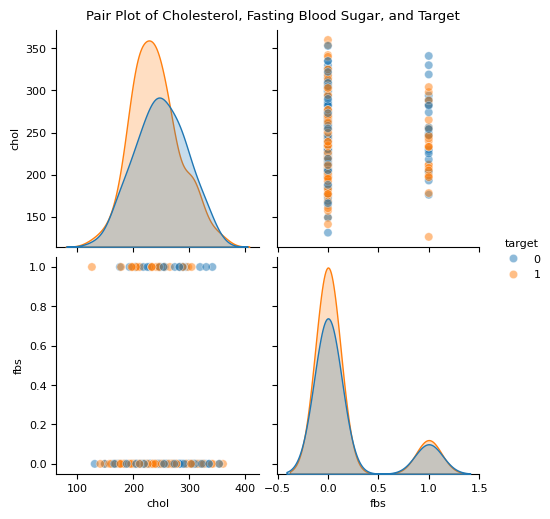

In [ ]:
# Memilih kolom yang akan diplot
cols_to_plot = ['chol', 'fbs', 'target']

sns.pairplot(df[cols_to_plot], hue='target', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Cholesterol, Fasting Blood Sugar, and Target', y=1.02)
plt.show()

In [ ]:
def diet_pattern_status(row):
    if (row['chol'] < 200.0) and (row['fbs'] == 0):
        return "Healthy Diet Pattern"
    else:
        return "Unhealthy Diet Pattern"

# Definisi label yang diinginkan
label_mapping = {
    "Healthy Diet Pattern": 0,
    "Unhealthy Diet Pattern": 1
}

# Membuat DataFrame baru untuk hasil fungsi Vascular Health Status
df_diet_pattern_a = pd.DataFrame(df.apply(diet_pattern_status, axis=1), columns=['diet_pattern'])

# Inisialisasi label encoder dengan label yang diinginkan
encoder_diet_pattern = LabelEncoder()

# Fit transform pada data Vascular Health Status dengan label yang diinginkan
diet_pattern_encoded = encoder_diet_pattern.fit_transform(df_diet_pattern_a['diet_pattern'])

# Menggabungkan df_diet_pattern_a dan physical_activity_encoded
merged_df_diet_pattern = pd.concat([df_diet_pattern_a, pd.Series(df_diet_pattern_a['diet_pattern'].map(label_mapping), name='diet_pattern_encoded')], axis=1)

# Menampilkan DataFrame hasil penggabungan
print(merged_df_diet_pattern.head(5))


             diet_pattern  diet_pattern_encoded
0  Unhealthy Diet Pattern                     1
1  Unhealthy Diet Pattern                     1
2    Healthy Diet Pattern                     0
3  Unhealthy Diet Pattern                     1
4  Unhealthy Diet Pattern                     1


In [ ]:
# Menambahkan ke df setelah kolom fbs
df.insert(8, 'diet_pattern', merged_df_diet_pattern["diet_pattern_encoded"])

# Menampilkan DataFrame dengan kolom 'det_pattern'
print(df.head(5))

   age  age_group  sex  cp  trestbps  bpsc   chol  fbs  diet_pattern  restecg  \
0   52          2    1   0     125.0     1  212.0    0             1        1   
1   53          2    1   0     140.0     2  203.0    1             1        0   
2   70          3    1   0     145.0     2  174.0    0             0        1   
3   61          3    1   0     148.0     2  203.0    0             1        1   
4   62          3    0   0     138.0     1  294.0    1             1        1   

   thalach  exang  oldpeak  slope  ca  thal  target  
0    168.0      0      1.0      2   2     3       0  
1    155.0      1      3.1      0   0     3       0  
2    125.0      1      2.6      0   0     3       0  
3    161.0      0      0.0      2   1     3       0  
4    106.0      0      1.9      1   3     2       0  


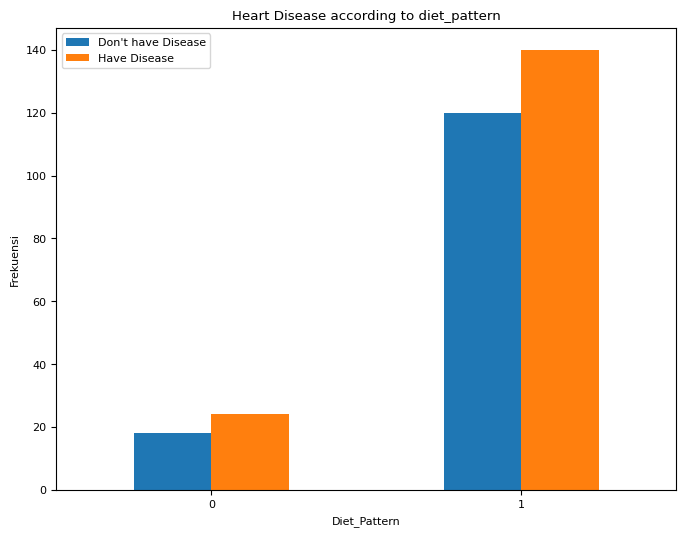

In [ ]:
# Plot crosstab dengan grafik batang
crosstab_result = pd.crosstab(df['diet_pattern'], df['target'])

# Sortir nilai-nilai unik dalam kolom 'age_group' secara ascending
sorted_diet_pattern = df['diet_pattern'].unique()
sorted_diet_pattern.sort()

# plotting
ax = crosstab_result.plot(kind="bar", figsize=(8, 6))

plt.title("Heart Disease according to diet_pattern")
plt.xlabel("Diet_Pattern")
plt.ylabel("Frekuensi")
plt.xticks(range(len(sorted_diet_pattern)), sorted_diet_pattern, rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

#### **4. Menambah Feature pal (Physical Activity Level)**

Aktivitas fisik yang teratur setiap hari dapat menurunkan risiko penyakit jantung. Aktivitas fisik membantu mengendalikan berat badan dan juga menurunkan kemungkinan terkena kondisi lain yang dapat memberikan tekanan pada jantung. Dengan menambahkan feature pal (Physical Activity Level) kita dapat mengetahui tingkat aktivitas fisik yang dapat membantu dalam mengambil langkah-langkah preventif untuk mencegah penyakit jantung.\
Parameter oldpeak dan slope dapat menggambarkan tingkat aktivitas fisik seseorang, jika memiliki nilai oldpeak yang rendah dan slope yang curam maka sangat memungkinkan bahwa individu tersebut memiliki tingkat aktivitas fisik yang lebih tinggi.

**note:**
Nilai Slope digambarkan dengan 3 kategori, yaitu naik, datar, dan turun. Dalam dataset heart disease nilai tersebut sudah diberikan label dengan :\
0 = naik
1 = datar
2 = turun

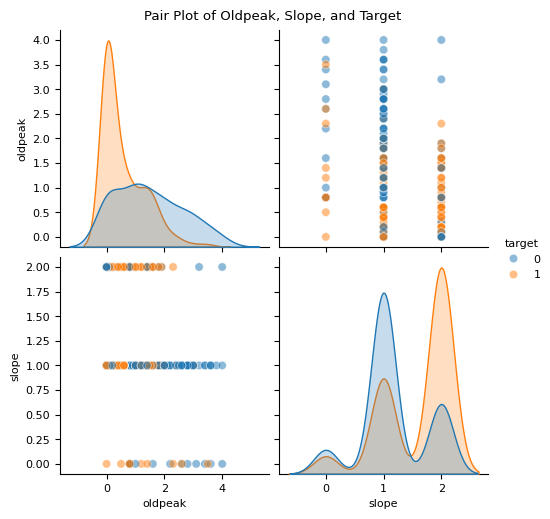

In [ ]:
# Memilih kolom yang akan diplot
cols_to_plot = ['oldpeak', 'slope', 'target']

sns.pairplot(df[cols_to_plot], hue='target', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Oldpeak, Slope, and Target', y=1.02)
plt.show()

In [ ]:
def physical_activity_level(row):
    if ((row['slope'] == 0 and row['oldpeak'] <= 1.0) |
        (row['slope'] == 1 and row['oldpeak'] <= 1.0)):
        return "High"
    elif ((row['slope'] == 0 and 1.0 < row['oldpeak'] <= 2.0) |
          (row['slope'] == 1 and 1.0 < row['oldpeak'] <= 2.0) |
          (row['slope'] == 0 and row['oldpeak'] > 2.0)):
        return "Moderate"
    elif ((row['slope'] == 2 and row['oldpeak'] <= 1.0) |
          (row['slope'] == 2 and 1.0 < row['oldpeak'] <= 2.0) |
          (row['slope'] == 1 and row['oldpeak'] > 2.0) |
          (row['slope'] == 2 and row['oldpeak'] > 2.0)):
        return "Low"
    else:
        return "Undefined"

# Definisi label yang diinginkan
label_mapping = {
    "Low": 0,
    "Moderate": 1,
    "High": 2
}

# Membuat DataFrame baru untuk hasil fungsi pal
df_pal_a = pd.DataFrame(df.apply(physical_activity_level, axis=1), columns=['pal'])

# Inisialisasi label encoder dengan label yang diinginkan
encoder_pal = LabelEncoder()

# Fit transform pada data Physical Activity Level dengan label yang diinginkan
pal_encoded = encoder_pal.fit_transform(df_pal_a['pal'])

# Menggabungkan df_pal_a dan physical_activity_encoded
merged_df_pal = pd.concat([df_pal_a, pd.Series(df_pal_a['pal'].map(label_mapping), name='pal_encoded')], axis=1)

# Menampilkan DataFrame hasil penggabungan
print(merged_df_pal.head(5))


        pal  pal_encoded
0       Low            0
1  Moderate            1
2  Moderate            1
3       Low            0
4  Moderate            1


In [ ]:
# Menambahkan ke df setelah kolom slope
df.insert(14, 'pal', merged_df_pal["pal_encoded"])

# Menampilkan DataFrame dengan kolom 'physical_activity'
print(df.head(5))

   age  age_group  sex  cp  trestbps  bpsc   chol  fbs  diet_pattern  restecg  \
0   52          2    1   0     125.0     1  212.0    0             1        1   
1   53          2    1   0     140.0     2  203.0    1             1        0   
2   70          3    1   0     145.0     2  174.0    0             0        1   
3   61          3    1   0     148.0     2  203.0    0             1        1   
4   62          3    0   0     138.0     1  294.0    1             1        1   

   thalach  exang  oldpeak  slope  pal  ca  thal  target  
0    168.0      0      1.0      2    0   2     3       0  
1    155.0      1      3.1      0    1   0     3       0  
2    125.0      1      2.6      0    1   0     3       0  
3    161.0      0      0.0      2    0   1     3       0  
4    106.0      0      1.9      1    1   3     2       0  


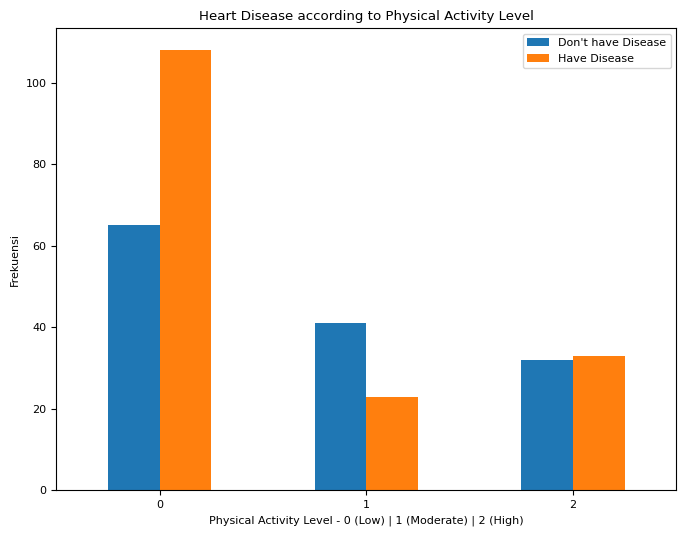

In [ ]:
# Plot crosstab dengan grafik batang
crosstab_result = pd.crosstab(df['pal'], df['target'])

# Sortir nilai-nilai unik dalam kolom 'pal' secara ascending
sorted_pal = df['pal'].unique()
sorted_pal.sort()

# plotting
ax = crosstab_result.plot(kind="bar", figsize=(8, 6))

plt.title("Heart Disease according to Physical Activity Level")
plt.xlabel("Physical Activity Level - 0 (Low) | 1 (Moderate) | 2 (High)")
plt.ylabel("Frekuensi")
plt.xticks(range(len(sorted_pal)), sorted_pal, rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

#### **5. Menambahkan Feature vhs (Vascular Health Status)**

VHS (Vascular Health Status) merupakan kondisi kesehatan pembuluh darah yang mencakup kerusahan atau penyumbatan pada pembuluh darah. Ketika status kesehatan pembuluh darah tidak baik, maka dapat berpengaruh terhadap penyakit jantung. Hal ini dikarenakan aliran darah yang menuju jantung akan terhambat dan bahkan dapat menyebabkan kerusakan pada otot jantung yang dapat membuat jantung tidak dapat memompa darah dengan efisien ke seluruh tubuh. Dengan mengetahui Vascular Health Status, dapat dilakukan langkah preventif untuk menurunkan risiko penyakit jantung, seperti berhenti merokok dan menghindari stress.

Feature yang digunakan untuk membuat feature baru yang merujuk pada vascular health status adalah ca dan thal.

**ca :** berisi jumlah pembulur darah utama yang terlihat berdasarkan hasil pemeriksaan\
**thal :** mengacu pada jenis kelainan pada pembuluh darah atau thalassemia (1 = normal, 2 = fixed defect, 3 = reversable defect)

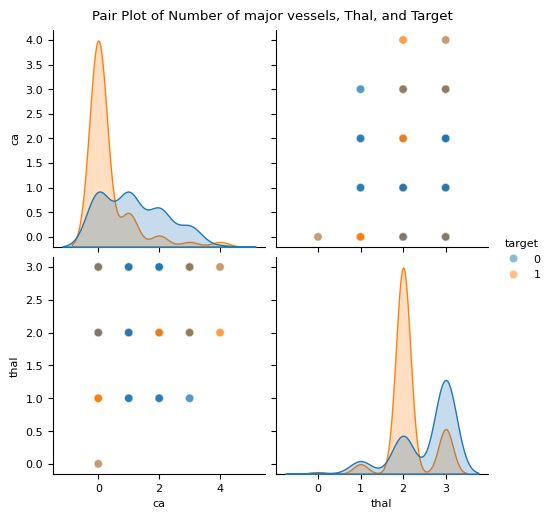

In [ ]:
# Memilih kolom yang akan diplot
cols_to_plot = ['ca', 'thal', 'target']

sns.pairplot(df[cols_to_plot], hue='target', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Number of major vessels, Thal, and Target', y=1.02)
plt.show()

In [ ]:
# Definisi fungsi Vascular Health Status
def vascular_health_status(row):
    if (((row['ca'] == 0) and (row['thal'] == 0)) |
        ((row['ca'] == 0) and (row['thal'] == 1)) |
        ((row['ca'] == 1) and (row['thal'] == 0)) |
        ((row['ca'] == 1) and (row['thal'] == 1)) |
        ((row['ca'] == 2) and (row['thal'] == 0)) |
        ((row['ca'] == 2) and (row['thal'] == 1))):
        return "Normal"
    elif (((row['ca'] == 0) and (row['thal'] == 3)) |
          ((row['ca'] == 3) and (row['thal'] == 0)) |
          ((row['ca'] == 3) and (row['thal'] == 1)) |
          ((row['ca'] == 4) and (row['thal'] == 0)) |
          ((row['ca'] == 4) and (row['thal'] == 1))):
      return "Mild"
    elif (((row['ca'] == 1) and (row['thal'] == 3)) |
          ((row['ca'] == 2) and (row['thal'] == 3)) |
          ((row['ca'] == 3) and (row['thal'] == 3))):
        return "Moderate" # Sedang
    elif (((row['ca'] == 0) and (row['thal'] == 2)) |
          ((row['ca'] == 1) and (row['thal'] == 2)) |
          ((row['ca'] == 2) and (row['thal'] == 2)) |
          ((row['ca'] == 3) and (row['thal'] == 2)) |
          ((row['ca'] == 4) and (row['thal'] == 2)) |
          ((row['ca'] == 4) and (row['thal'] == 3))):
        return "Severe"
    else:
      return "Undefined"

# Definisi label yang diinginkan
label_mapping = {
    "Normal": 0,
    "Mild": 1,
    "Moderate": 2,
    "Severe": 3
}

# Membuat DataFrame baru untuk hasil fungsi vhs
df_vhs_a = pd.DataFrame(df.apply(vascular_health_status, axis=1), columns=['vhs'])

# Inisialisasi label encoder dengan label yang diinginkan
encoder_vhs = LabelEncoder()

# Fit transform pada data Physical Activity Level dengan label yang diinginkan
vhs_encoded = encoder_vhs.fit_transform(df_vhs_a['vhs'])

# Menggabungkan df_vhs_a dan vhs_encoded
merged_df_vhs = pd.concat([df_vhs_a, pd.Series(df_vhs_a['vhs'].map(label_mapping), name='vhs_encoded')], axis=1)

# Menampilkan DataFrame hasil penggabungan
print(merged_df_vhs.head(5))


        vhs  vhs_encoded
0  Moderate            2
1      Mild            1
2      Mild            1
3  Moderate            2
4    Severe            3


In [ ]:
# Menambahkan ke df setelah kolom thal
df.insert(17, "vascular_health", merged_df_vhs["vhs_encoded"])

# Menampilkan DataFrame dengan kolom 'vascular_health'
print(df.head(5))

   age  age_group  sex  cp  trestbps  bpsc   chol  fbs  diet_pattern  restecg  \
0   52          2    1   0     125.0     1  212.0    0             1        1   
1   53          2    1   0     140.0     2  203.0    1             1        0   
2   70          3    1   0     145.0     2  174.0    0             0        1   
3   61          3    1   0     148.0     2  203.0    0             1        1   
4   62          3    0   0     138.0     1  294.0    1             1        1   

   thalach  exang  oldpeak  slope  pal  ca  thal  vascular_health  target  
0    168.0      0      1.0      2    0   2     3                2       0  
1    155.0      1      3.1      0    1   0     3                1       0  
2    125.0      1      2.6      0    1   0     3                1       0  
3    161.0      0      0.0      2    0   1     3                2       0  
4    106.0      0      1.9      1    1   3     2                3       0  


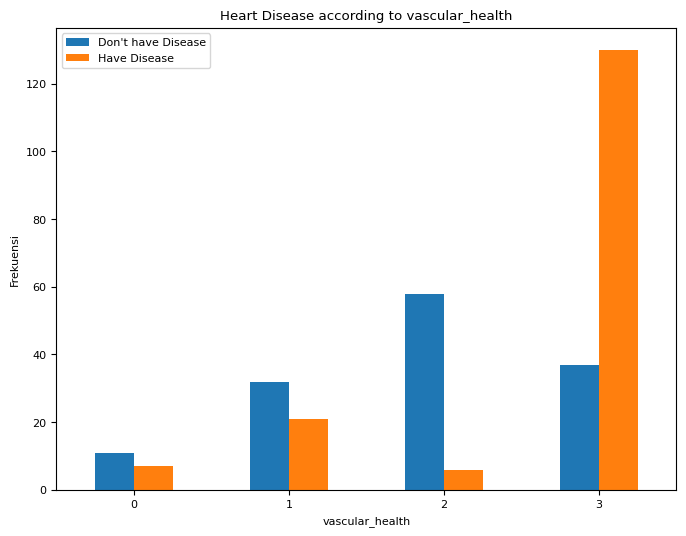

In [ ]:
# Plot crosstab dengan grafik batang
crosstab_result = pd.crosstab(df['vascular_health'], df['target'])

# Sortir nilai-nilai unik dalam kolom 'age_group' secara ascending
sorted_vascular_health = df['vascular_health'].unique()
sorted_vascular_health.sort()

# plotting
ax = crosstab_result.plot(kind="bar", figsize=(8, 6))

plt.title("Heart Disease according to vascular_health")
plt.xlabel("vascular_health")
plt.ylabel("Frekuensi")
plt.xticks(range(len(sorted_vascular_health)), sorted_vascular_health, rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.show()

#### **6. Menambahkan Feature st_slope_ratio**

ST Slope Ratio merupakan rasio antara ST segment/oldpeak dengan denyut jantung maksimum/thalach. Dengan menambahkan feature ini dapat memberikan indikasi mengenai iskemia miokard atau masalah pada aliran darah ke jantung. Iskemia miokard terjadi ketika pasokan darah ke otot jantung berkurang, yang dapat disebabkan oleh penyakit arteri koroner. Semakin tinggi rasio ST segment terhadap thalach, maka semakin besar kemungkinan adanya gangguan fungsi jantung.

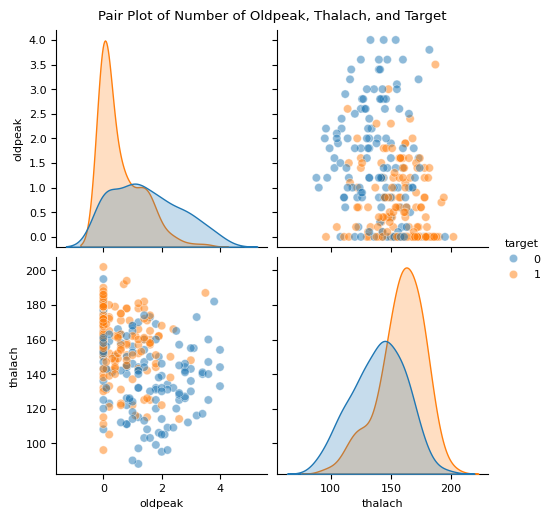

In [ ]:
# Memilih kolom yang akan diplot
cols_to_plot = ['oldpeak', 'thalach', 'target']

sns.pairplot(df[cols_to_plot], hue='target', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Number of Oldpeak, Thalach, and Target', y=1.02)
plt.show()

In [ ]:
# Mengihitung ST Slope Ratio
st_slope_ratio = pd.DataFrame(df["oldpeak"] / df["thalach"])

# Menambahkan ke dataframe setelah kolom oldpeak
df.insert(13, "st_slope_ratio", st_slope_ratio)

In [ ]:
df.head(5)

,age,age_group,sex,cp,trestbps,bpsc,chol,fbs,diet_pattern,restecg,thalach,exang,oldpeak,st_slope_ratio,slope,pal,ca,thal,vascular_health,target
0,52,2,1,0,125.0,1,212.0,0,1,1,168.0,0,1.0,0.005952,2,0,2,3,2,0
1,53,2,1,0,140.0,2,203.0,1,1,0,155.0,1,3.1,0.020000,0,1,0,3,1,0
2,70,3,1,0,145.0,2,174.0,0,0,1,125.0,1,2.6,0.020800,0,1,0,3,1,0
3,61,3,1,0,148.0,2,203.0,0,1,1,161.0,0,0.0,0.000000,2,0,1,3,2,0
4,62,3,0,0,138.0,1,294.0,1,1,1,106.0,0,1.9,0.017925,1,1,3,2,3,0


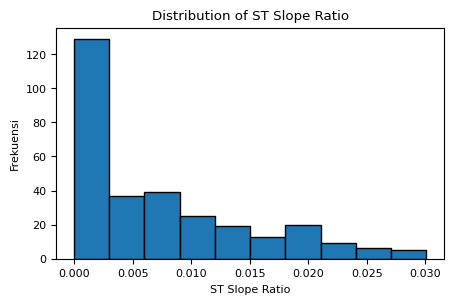

In [ ]:
# Set ukuran gambar
plt.figure(figsize=(5, 3))

# Plot histogram
plt.hist(df['st_slope_ratio'], bins=10, edgecolor='black')

# Tambahkan label dan judul
plt.xlabel('ST Slope Ratio')
plt.ylabel('Frekuensi')
plt.title('Distribution of ST Slope Ratio')

# Tampilkan plot
plt.show()

### **Menampilkan Feature Baru**

In [ ]:
selected_columns = ["age_group", "bpsc", "diet_pattern", "st_slope_ratio", "pal", "vascular_health"]

In [ ]:
df_selected = df[selected_columns]
df_selected.head()

,age_group,bpsc,diet_pattern,st_slope_ratio,pal,vascular_health
0,2,1,1,0.005952,0,2
1,2,2,1,0.020000,1,1
2,3,2,0,0.020800,1,1
3,3,2,1,0.000000,0,2
4,3,1,1,0.017925,1,3


In [ ]:
df.head(5)

,age,age_group,sex,cp,trestbps,bpsc,chol,fbs,diet_pattern,restecg,thalach,exang,oldpeak,st_slope_ratio,slope,pal,ca,thal,vascular_health,target
0,52,2,1,0,125.0,1,212.0,0,1,1,168.0,0,1.0,0.005952,2,0,2,3,2,0
1,53,2,1,0,140.0,2,203.0,1,1,0,155.0,1,3.1,0.020000,0,1,0,3,1,0
2,70,3,1,0,145.0,2,174.0,0,0,1,125.0,1,2.6,0.020800,0,1,0,3,1,0
3,61,3,1,0,148.0,2,203.0,0,1,1,161.0,0,0.0,0.000000,2,0,1,3,2,0
4,62,3,0,0,138.0,1,294.0,1,1,1,106.0,0,1.9,0.017925,1,1,3,2,3,0


# **Assignment 3**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

## Determinasi Model Machine Learning

Dataset heart disease memerlukan pemodelan supervised learning karena memiliki label atau target yang ingin diprediksi berdasarkan fitur-fitur yang ada. Dalam kasus dataset heart disease, hal yang ingin dilakukan adalah memprediksi apakah seseorang menderita penyakit jantung berdasarkan karakteristik klinis mereka. Oleh karena itu, dalam dataset hear disease memiliki label yang sudah diketahui (misalnya, pasien memiliki penyakit jantung atau tidak) yang harus diprediksi oleh model berdasarkan fitur-fitur seperti tekanan darah, kolestrol, usia, jenis kelamin, dan lainnya.


Pemilihan supervised learning cocok untuk kasus ini karena dataset memiliki data yang berlabel dan dapat dibuat model yang dapat mempelajari pola dari data yang ada untuk memprediksi label yang tidak diketahui pada data baru. Dengan menggunakan metode supervised learning, dapat mengajarkan model untuk mengenali pola-pola yang terkait dengan status penyakit jantung berdasarkan fitur-fitur yang ada dalam dataset. Hal ini memungkinkan untuk membuat prediksi yang lebih akurat tentang risiko seseorang mengalami penyakit jantung dan mengambil tindakan pencegahan atau pengobatan yang sesuai. **Model machine learning yang akan digunakan adalah Random Forest, SVM, KNN, dan XGBoost.**

## Coding Machine Learning Model

In [ ]:
X = df.drop("target", axis=1)
y = df['target']

### MinMax Scalling

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)
df_scaled

array([[0.47916667, 0.66666667, 1.        , ..., 0.5       , 1.        ,
        0.66666667],
       [0.5       , 0.66666667, 1.        , ..., 0.        , 1.        ,
        0.33333333],
       [0.85416667, 1.        , 1.        , ..., 0.        , 1.        ,
        0.33333333],
       ...,
       [0.47916667, 0.66666667, 1.        , ..., 0.25      , 1.        ,
        0.66666667],
       [0.625     , 0.66666667, 1.        , ..., 0.        , 0.66666667,
        1.        ],
       [0.52083333, 0.66666667, 1.        , ..., 0.25      , 1.        ,
        0.66666667]])

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)
df_scaled.head()

,age,age_group,sex,cp,trestbps,bpsc,chol,fbs,diet_pattern,restecg,thalach,exang,oldpeak,st_slope_ratio,slope,pal,ca,thal,vascular_health
0,0.479167,0.666667,1.0,0.0,0.407895,0.333333,0.367521,0.0,1.0,0.5,0.701754,0.0,0.250,0.197917,1.0,0.0,0.50,1.000000,0.666667
1,0.500000,0.666667,1.0,0.0,0.605263,0.666667,0.329060,1.0,1.0,0.0,0.587719,1.0,0.775,0.665000,0.0,0.5,0.00,1.000000,0.333333
2,0.854167,1.000000,1.0,0.0,0.671053,0.666667,0.205128,0.0,0.0,0.5,0.324561,1.0,0.650,0.691600,0.0,0.5,0.00,1.000000,0.333333
3,0.666667,1.000000,1.0,0.0,0.710526,0.666667,0.329060,0.0,1.0,0.5,0.640351,0.0,0.000,0.000000,1.0,0.0,0.25,1.000000,0.666667
4,0.687500,1.000000,0.0,0.0,0.578947,0.333333,0.717949,1.0,1.0,0.5,0.157895,0.0,0.475,0.595991,0.5,0.5,0.75,0.666667,1.000000


### Spliting Dataset

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((241, 19), (61, 19))

In [ ]:
y_train.shape, y_test.shape

((241,), (61,))

### Feature Selection

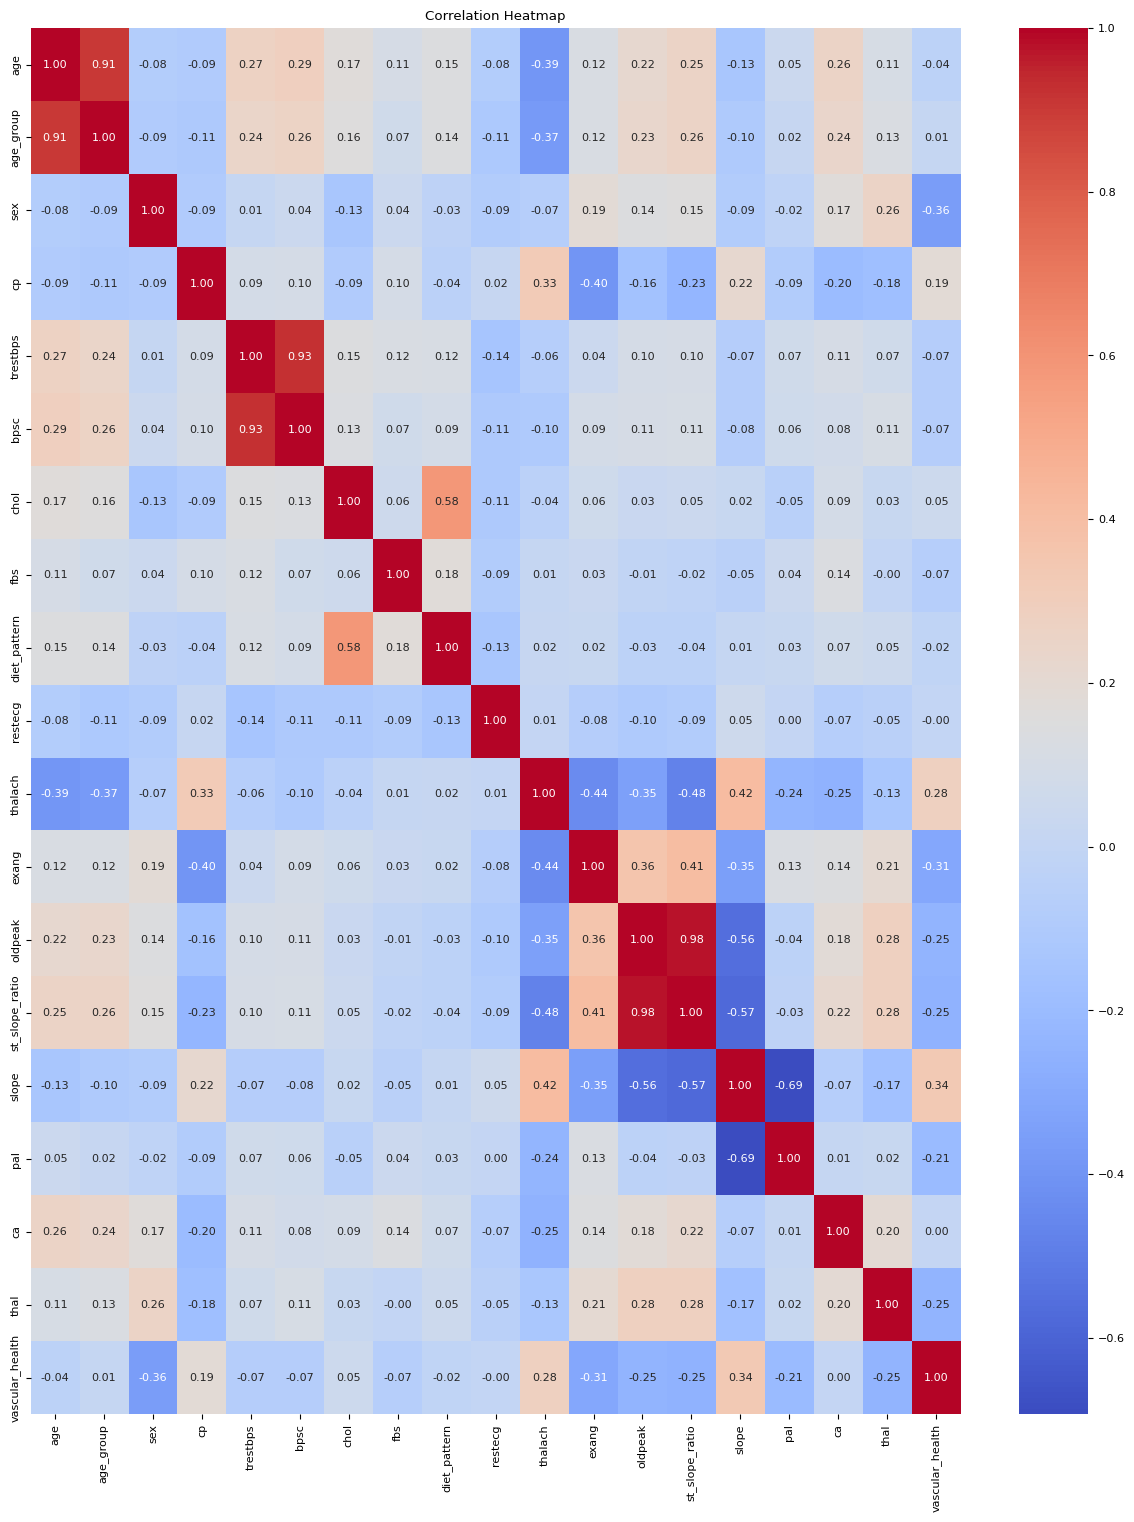

In [ ]:
# Menghitung matriks korelasi
corr_matrix = X_train.corr()

plt.figure(figsize=(15,18))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.rcParams['font.size']=8
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Seleksi fitur menggunakan model pembelajaran mesin (misal: RandomForestClassifier)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Mengambil fitur-fitur yang penting
selected_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
selected_features.sort_values(by='Importance', ascending=False, inplace=True)
print(selected_features)

            Feature  Importance
3                cp    0.115643
13   st_slope_ratio    0.107444
18  vascular_health    0.100146
10          thalach    0.097830
17             thal    0.079191
16               ca    0.071990
6              chol    0.064679
12          oldpeak    0.062694
0               age    0.062271
4          trestbps    0.049943
11            exang    0.042703
2               sex    0.027007
9           restecg    0.024675
5              bpsc    0.024257
14            slope    0.023904
1         age_group    0.019296
15              pal    0.012394
7               fbs    0.007555
8      diet_pattern    0.006379


In [ ]:
# Seleksi fitur berdasarkan importance
threshold = 0.02
selected_features = selected_features[selected_features['Importance'] > threshold]['Feature']
selected_features

3                  cp
13     st_slope_ratio
18    vascular_health
10            thalach
17               thal
16                 ca
6                chol
12            oldpeak
0                 age
4            trestbps
11              exang
2                 sex
9             restecg
5                bpsc
14              slope
Name: Feature, dtype: object

In [ ]:
# Dataframe baru dengan fitur-fitur yang terpilih
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### **Random Forest Classifier**

Alasan menggunakan Random Forest:
* Random Forest efektif dalam menangani dataset dengan banyak fitur dan kompleksitas yang tinggi, yang sering terjadi dalam dataset medis seperti dataset heart disease.
* Random Forest menyediakan perkiraan kepentingan fitur, yang memungkinkan kita untuk memahami kontribusi setiap fitur terhadap prediksi penyakit jantung. Ini dapat membantu dalam pemahaman medis tentang faktor-faktor yang berkontribusi terhadap risiko penyakit jantung.
* Random Forest relatif mudah digunakan dan tidak memerlukan banyak penyetelan parameter. Ini membuatnya cocok untuk digunakan oleh praktisi medis atau peneliti yang mungkin tidak memiliki latar belakang teknis yang mendalam dalam pembelajaran mesin.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_selected, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test_selected)

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.819672131147541

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



#### **Cross-Validation Basic**

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dari setiap lipatan
accuracies = []

# List untuk menyimpan model terbaik dari setiap lipatan
best_models = []

# Melakukan iterasi pada setiap lipatan
for train_index, test_index in kf.split(X_train_selected):
    X_train_fold, X_test_fold = X_train_selected.iloc[train_index], X_train_selected.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Melatih model pada lipatan saat ini
    rf.fit(X_train_fold, y_train_fold)

    # Lakukan prediksi pada data uji pada lipatan saat ini
    y_pred_fold = rf.predict(X_test_fold)

    # Hitung akurasi pada lipatan saat ini
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(accuracy_fold)

    # Simpan model terbaik dari lipatan saat ini
    best_models.append(rf)

# Cari lipatan dengan akurasi tertinggi
best_fold_index = accuracies.index(max(accuracies))
best_model = best_models[best_fold_index]

# Lakukan prediksi pada data uji dengan model terbaik
y_pred_test = best_model.predict(X_test_selected)


In [ ]:
cv_scores = cross_val_score(best_model, X_train_selected, y_train, cv=kf, scoring='accuracy')

In [ ]:
# Tampilkan hasil cross validation
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Scores: [0.84       0.875      0.79166667 0.75       0.91666667 0.75
 0.91666667 0.70833333 0.79166667 0.83333333]
Mean CV Accuracy: 0.8173333333333334


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

0.82 accuracy with a standard deviation of 0.07


In [ ]:
# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



#### **Hyperparameter Tunning**

In [ ]:
# Parameter yang akan diuji
param = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon dalam ensemble
    'max_depth': [None, 10, 20],        # Kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5, 10],    # Jumlah sampel minimum yang diperlukan untuk membagi simpul
    'min_samples_leaf': [1, 2, 4]       # Jumlah sampel minimum yang diperlukan di setiap leaf node
}

# Membuat objek GridSearchCV
gs_rf = GridSearchCV(best_model, param, cv=kf, n_jobs=-1, scoring='accuracy')

In [ ]:
# Melatih model dengan data yang dipilih
gs_rf.fit(X_train_selected, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Menampilkan parameter terbaik yang ditemukan
print("Best parameters:", gs_rf.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
gs_rf.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
gs_rf.best_score_

0.8506666666666668

In [ ]:
best_rf_model = RandomForestClassifier(max_depth = None, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 300)

In [ ]:
best_rf_model.fit(X_train_selected, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=300)

In [ ]:
y_pred_rf2 = best_rf_model.predict(X_test_selected)
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



#### **Learning Curves**

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve, ShuffleSplit

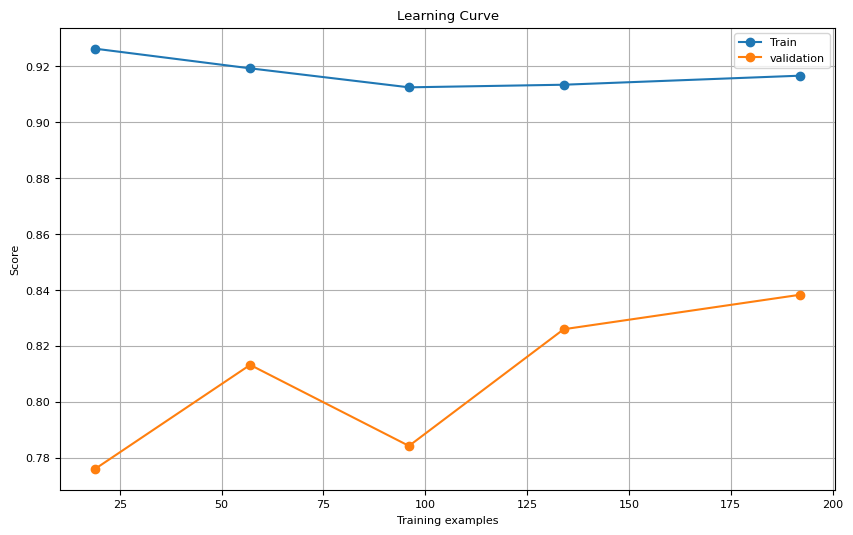

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_rf_model,
    X=X_train_selected,
    y=y_train,
    cv=5,
    scoring="accuracy",
    train_sizes= [0.1, 0.3, 0.5, 0.7, 1.0]
)

# Hitung rata-rata skor untuk setiap ukuran training
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Train')
plt.plot(train_sizes, test_scores_mean, 'o-', label='validation')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

**Penjelasan Learning Curves**

* **Training :** Kurva ini menunjukkan konsistensi nilai yang relatif tetap sepanjang jumlah contoh pelatihan. Pelatihan dimulai dan berakhir dengan tingkat kerja yang tinggi sekitar 0.92, yang menunjukkan bahwa model berhasil menyesuaikan diri dengan baik terhadap data pelatihan.
* **Validation :** Kurva menunjukkan kecenderungan naik seiring dengan bertambahkan jumlah data training. Dimulai dari sekitar 0.78 dan meningkat menjadi sekitar 0.8, lalu mengalami peningkatan kembali menjadi sekitar 0.82. Hal ini menunjukkan bahwa model cenderung memiliki kinerja yang baik pada data yang belum dilihat saat jumlah contoh pelatihan ditingkatkan.
* **Gap antara Training dan Validation :** Terdapat jarak yang cukup besar antara kedua kurva yang menunjukkan adanya sedikit overfitting. Artinya, model cenderung memberikan kinerja yang jauh lebih baik pada data pelatihan pada data yang belum dilihat.

In [ ]:
from sklearn.metrics import confusion_matrix

### KNN

Alasan menggunakan KNN:
* KNN adalah salah satu algoritma yang non-parametrik, yang berarti tidak melakukan asumsi tertentu tentang distribusi data. Ini membuatnya berguna ketika data tidak mengikuti distribusi tertentu atau ketika distribusi data tidak diketahui.
* KNN relatif mudah dipahami dan diinterpretasikan, terutama untuk praktisi medis yang mungkin tidak memiliki latar belakang teknis dalam pembelajaran mesin. Algoritma ini menghitung prediksi berdasarkan kesamaan dengan tetangga terdekat, yang memiliki interpretasi intuitif.
* KNN memungkinkan kita untuk menyesuaikan jumlah tetangga yang digunakan dalam prediksi. Ini memberikan fleksibilitas untuk menyesuaikan model sesuai dengan kebutuhan dan karakteristik dataset.
* KNN adalah algoritma lazy learning, yang berarti tidak memerlukan proses pelatihan yang panjang. Ini membuatnya cocok untuk digunakan dalam situasi di mana waktu komputasi terbatas.

In [ ]:
# Inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train_selected, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train_selected, y_train)

0.8713692946058091

In [ ]:
y_pred_knn = knn.predict(X_test_selected)

In [ ]:
accuracy_score(y_test, y_pred_knn)

0.8032786885245902

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



#### **Cross Validation Basic**

In [ ]:
# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dari setiap lipatan
accuracies = []

# List untuk menyimpan model terbaik dari setiap lipatan
best_models = []

# Melakukan iterasi pada setiap lipatan
for train_index, test_index in kf.split(X_train_selected):
    X_train_fold, X_test_fold = X_train_selected.iloc[train_index], X_train_selected.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Melatih model pada lipatan saat ini
    knn.fit(X_train_fold, y_train_fold)

    # Lakukan prediksi pada data uji pada lipatan saat ini
    y_pred_fold = knn.predict(X_test_fold)

    # Hitung akurasi pada lipatan saat ini
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(accuracy_fold)

    # Simpan model terbaik dari lipatan saat ini
    best_models.append(knn)

# Cari lipatan dengan akurasi tertinggi
best_fold_index = accuracies.index(max(accuracies))
best_model = best_models[best_fold_index]

# Lakukan prediksi pada data uji dengan model terbaik
y_pred_test_knn = best_model.predict(X_test_selected)

In [ ]:
# Lakukan cross-validation dengan model KNN terbaik
cv_scores = cross_val_score(best_model, X_train_selected, y_train, cv=kf, scoring='accuracy')

In [ ]:
# Tampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.7755102  0.83333333 0.8125     0.79166667 0.79166667]
Mean CV Score: 0.8009353741496599


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

0.80 accuracy with a standard deviation of 0.02


In [ ]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        32
           1       0.75      0.72      0.74        29

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [ ]:
accuracy_score(y_test, y_pred_test_knn)

0.7540983606557377

#### **Hyperparameter Tunning**

In [ ]:
# Menentukan parameter grid yang ingin dioptimalkan
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=kf, scoring='accuracy')

In [ ]:
# Melakukan pencarian grid pada data training
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
# Mendapatkan model terbaik
grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [ ]:
grid_search.best_score_

0.8424319727891156

In [ ]:
best_knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors = 20, weights= 'uniform')

In [ ]:
best_knn_model.fit(X_train_selected, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=20)

In [ ]:
# Menampilkan laporan klasifikasi
y_pred_knn2 = best_knn_model.predict(X_test_selected)
print(classification_report(y_test, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.78        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



#### **Learning Curves**

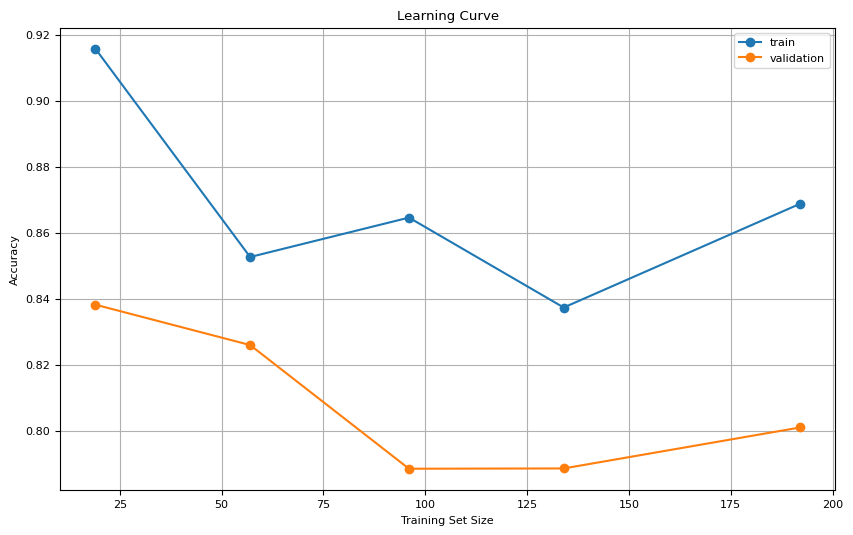

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_train_selected,
    y=y_train,
    cv=kf,
    scoring="accuracy",
    train_sizes= [0.1, 0.3, 0.5, 0.7, 1.0]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.subplots(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', label="train")
plt.plot(train_sizes, test_mean, 'o-', label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

**Penjelasan Learning Curves**

* **Training :** Di awal, kurva menunjukkan kinerja yang kurang maksimal karena mengalami penurunan dari sekitar 0.92 hingga sekitar 0.84, lalu mengalami kenalikan hingga sekitar 0.86.
* **Validation :** Di awal, kurva menunjukkan kinerja yang kurang maksimal karena mengalami penurunan dari 0.84 hingga kurang dari 0.8 dan mengalami kenaikan dengan tidak signifikan hingga lebih sedikit dari 0.8
* **Gap antara Training dan Validation :** Terdapat jarak yang cukup besar di antara kedua kurva. Sehingga dapat dikatakan terdapat sedikit overfitting dalam model.

### SVM

Alasan menggunakan SVM :
* SVM dapat menangani baik masalah klasifikasi linear maupun non-linear. Ini berarti SVM dapat memodelkan hubungan yang kompleks antara fitur dan target dalam dataset heart disease.
* SVM memiliki parameter yang dapat dikontrol, seperti parameter regularisasi dan kernel, yang memungkinkan kita untuk mengontrol kompleksitas model dan mengurangi risiko overfitting.
* SVM memiliki dukungan untuk menangani dataset yang tidak seimbang, yang sering terjadi dalam dataset medis. Dengan memanfaatkan penalti yang berbeda untuk kelas minoritas, SVM dapat membantu meningkatkan kinerja pada kelas yang kurang mewakili.
* SVM menghasilkan model yang mudah diinterpretasikan, terutama ketika digunakan dengan kernel linier. Ini membuatnya berguna dalam konteks medis di mana interpretasi model sering kali penting

In [ ]:
from sklearn import svm

In [ ]:
model_svm = svm.SVC(kernel='linear')

In [ ]:
model_svm.fit(X_train_selected, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm = model_svm.predict(X_test_selected)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.78        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [ ]:
model_svm.score(X_test_selected, y_test)

0.7704918032786885

In [ ]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred_svm)

# Displaying the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7704918032786885


#### **Cross-Validation**

In [ ]:
# Inisialisasi KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dari setiap lipatan
accuracies = []

# List untuk menyimpan model terbaik dari setiap lipatan
best_models = []

# Melakukan iterasi pada setiap lipatan
for train_index, test_index in kf.split(X_train_selected):
    X_train_fold, X_test_fold = X_train_selected.iloc[train_index], X_train_selected.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Melatih model pada lipatan saat ini
    model_svm.fit(X_train_fold, y_train_fold)

    # Lakukan prediksi pada data uji pada lipatan saat ini
    y_pred_fold = model_svm.predict(X_test_fold)

    # Hitung akurasi pada lipatan saat ini
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(accuracy_fold)

    # Simpan model terbaik dari lipatan saat ini
    best_models.append(model_svm)

# Cari lipatan dengan akurasi tertinggi
best_fold_index = accuracies.index(max(accuracies))
best_model_svm = best_models[best_fold_index]

# Lakukan prediksi pada data uji dengan model terbaik
y_pred_test_svm = best_model_svm.predict(X_test_selected)

In [ ]:
cv_scores = cross_val_score(best_model_svm, X_train_selected, y_train, cv=kf, scoring='accuracy')

In [ ]:
# Tampilkan hasil cross validation
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Scores: [0.84       0.875      0.83333333 0.79166667 0.875      0.79166667
 0.95833333 0.75       0.95833333 0.875     ]
Mean CV Accuracy: 0.8548333333333332


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

0.85 accuracy with a standard deviation of 0.07


In [ ]:
# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.73      0.83      0.77        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



#### **Hyperparameter Tunning**

In [ ]:
from sklearn.svm import SVC

In [ ]:
param = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'C' : [0.1, 1]
}

gs_svm = GridSearchCV(best_model_svm, param, cv=10, n_jobs=-1)
gs_svm.fit(X_train_selected, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
gs_svm.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
gs_svm.best_score_

0.8505

In [ ]:
# Membuat model SVM dengan parameter terbaik
best_model_svm = SVC(**gs_svm.best_params_)
# Melatih model menggunakan data latih yang dipilih
best_model_svm.fit(X_train_selected, y_train)

SVC(C=1, kernel='linear')

In [ ]:
y_pred_svm3 = best_model_svm.predict(X_test_selected)

In [ ]:
print(classification_report(y_test, y_pred_svm3))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.78        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



#### **Learning Curves**

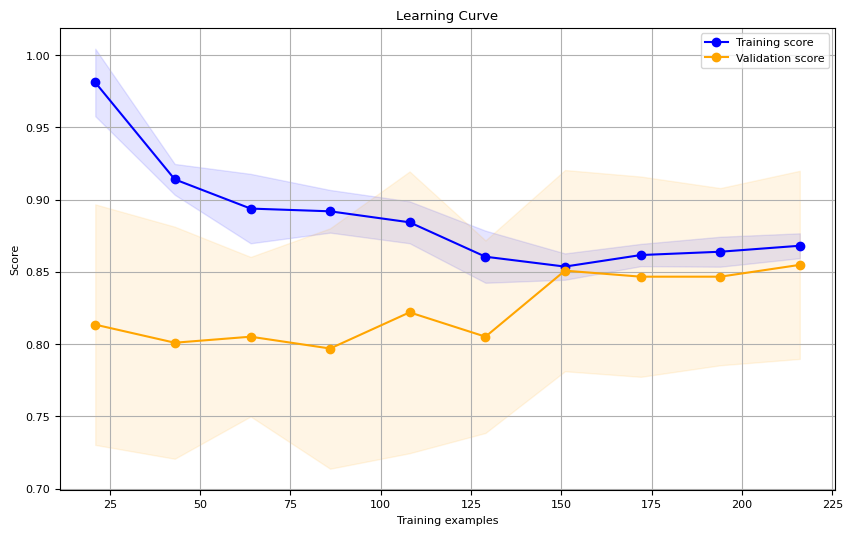

In [ ]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model_svm,
    X=X_train_selected,
    y=y_train,
    cv=kf,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)  # Adjust the range of training sizes as needed
)

# Calculate mean scores and standard deviations
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="blue")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="orange")
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Validation score")
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

**Penjelasan Learning Curves**

* **Training :** Di awal kurva mengalami peningkatan yang tinggi, hal ini menandakan bahwa model dengan baik dan cocok pada data pelatihan. Namun, seiring bertambahnya jumlah data training, kurva mengalami sedikit penurunan, hal ini menunjukkan adanya tantangan bagi model dalam menyesuaikan datase yang lebi besar secara sempurna.
* **Validation :** Di awal, kurva menunjukkan kinerja yang kurang maksimal terhadap data yang belum dilihat dengan sedikit data training. Namun, seiring bertambahnya data training, tingkat validasi meningkat dan menunjukkan peningkatan kinerja pada data yang belum dilihat.
* **Gap antara Training dan Validation :** Terdapat area bayangan di sekitar setiap kurva yang mencerminkan variabilitas atau ketidakpastian dalam skor tersebut. Meskipun demikian, model menunjukkan kinerja yang cukup baik secara keseluruhan.

### XGBoost

Alasan menggunakan XGBoost :
* XGBoost terkenal karena kinerjanya yang sangat baik dalam kompetisi data dan aplikasi dunia nyata. Algoritma ini sering kali memberikan hasil yang baik dalam waktu yang singkat, terutama ketika digunakan dengan parameter yang dioptimalkan.
* XGBoost mampu menangani hubungan yang kompleks antara fitur dan target, termasuk ketergantungan non-linear dan interaksi antar-fitur.
* XGBoost memiliki beberapa teknik regulasi yang memungkinkan kita untuk mengontrol kompleksitas model dan mencegah overfitting, seperti parameter pembelajaran dan kedalaman pohon.
* XGBoost dirancang untuk bekerja dengan baik pada dataset besar dan dapat dioptimalkan untuk kinerja yang cepat, membuatnya cocok untuk pemrosesan dataset medis yang umumnya memiliki banyak entri.

In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_selected, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test_selected)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [ ]:
# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.8032786885245902


#### **Cross-Validation**

In [ ]:
# Inisialisasi KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dari setiap lipatan
accuracies = []

# List untuk menyimpan model terbaik dari setiap lipatan
best_models = []

# Melakukan iterasi pada setiap lipatan
for train_index, test_index in kf.split(X_train_selected):
    X_train_fold, X_test_fold = X_train_selected.iloc[train_index], X_train_selected.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Melatih model pada lipatan saat ini
    model_xgb.fit(X_train_fold, y_train_fold)

    # Lakukan prediksi pada data uji pada lipatan saat ini
    y_pred_fold = model_xgb.predict(X_test_fold)

    # Hitung akurasi pada lipatan saat ini
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(accuracy_fold)

    # Simpan model terbaik dari lipatan saat ini
    best_models.append(model_xgb)

# Cari lipatan dengan akurasi tertinggi
best_fold_index = accuracies.index(max(accuracies))
best_model_xgb = best_models[best_fold_index]

# Lakukan prediksi pada data uji dengan model terbaik
y_pred_test_xgb = best_model_xgb.predict(X_test_selected)

In [ ]:
cv_scores = cross_val_score(best_model_xgb, X_train_selected, y_train, cv=kf, scoring='accuracy')

In [ ]:
# Tampilkan hasil cross validation
print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Scores: [0.76       0.875      0.79166667 0.79166667 0.875      0.79166667
 0.83333333 0.66666667 0.83333333 0.83333333]
Mean CV Accuracy: 0.8051666666666666


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

0.81 accuracy with a standard deviation of 0.06


In [ ]:
# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



#### **Hyperparameter Tunning**

In [ ]:
# Menentukan parameter yang akan diuji
param_grid = {
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'eta': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'objective': ['multi:softmax'],
    'num_class': [len(np.unique(y_train))],
    'eval_metric': ['merror']
}

In [ ]:
# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=best_model_xgb, param_grid=param_grid, scoring='accuracy', cv=kf, n_jobs=-1)

In [ ]:
# Melakukan grid search untuk mencari parameter terbaik
grid_search.fit(X_train_selected, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     in...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 0.9],
                         'eta': [0.01, 0.1, 0.3], 'eval_metric': ['merror'],
                         'max_depth': [3, 6, 9], 'min_child_weight': [1, 3, 5],
                         'num_class': [2], 'objective': ['multi:softmax'],
                         'subsample': [0.5, 0.7, 0.9]},
             scoring='accuracy')

In [ ]:
# Menampilkan parameter terbaik dan skor terbaik
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 0.7, 'eta': 0.01, 'eval_metric': 'merror', 'max_depth': 3, 'min_child_weight': 5, 'num_class': 2, 'objective': 'multi:softmax', 'subsample': 0.9}
Best score: 0.8508333333333334


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Membuat model XGBoost dengan parameter terbaik
best_model_xgb = XGBClassifier(**grid_search.best_params_)
# Melatih model menggunakan data latih yang dipilih
best_model_xgb.fit(X_train_selected, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric='merror',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=2, ...)

In [ ]:
# Menggunakan model terbaik untuk membuat prediksi pada data uji
y_pred_xgb3 = best_model_xgb.predict(X_test_selected)

In [ ]:
# Menampilkan akurasi dari model terbaik pada data uji
accuracy = accuracy_score(y_test, y_pred_xgb3)
print("Accuracy:", accuracy)

Accuracy: 0.819672131147541


In [ ]:
print(classification_report(y_test, y_pred_xgb3))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



#### **Learning Curves**

In [ ]:
# Menghitung learning curves
train_sizes, train_scores, valid_scores = learning_curve(
    best_model_xgb, X_train_selected, y_train, cv=kf, scoring='accuracy')

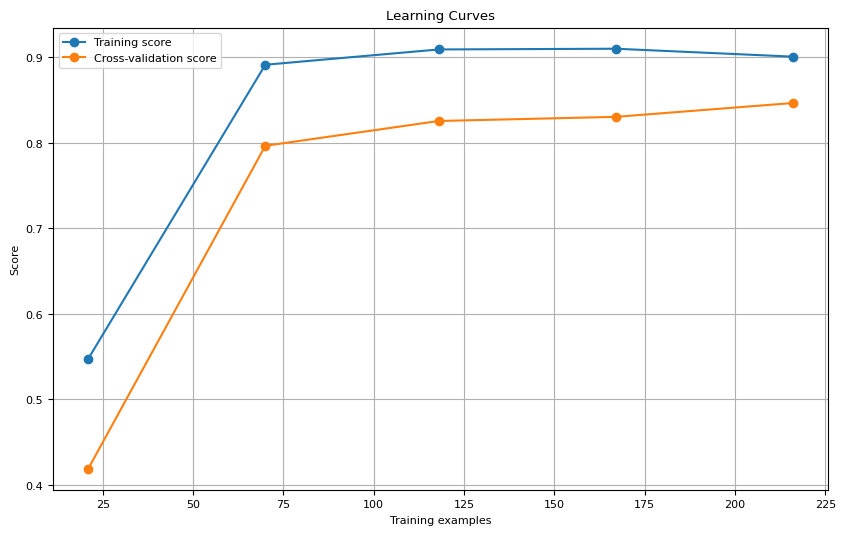

In [ ]:
# Menghitung rata-rata skor untuk setiap ukuran training
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, valid_scores_mean, 'o-', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

**Penjelasan Learning Curves**

* **Training :** Di awal kurva mengalami peningkatan yang tinggi hingga sekitar 0.9, hal ini menandakan bahwa model baik dan cocok pada data pelatihan. Namun, seiring bertambahnya jumlah data training, kurva mengalami sedikit penurunan pada titik sekitar 0.88, hal ini menunjukkan konsistensi dalam kinerja model pada data pelatihan.
* **Validation :** Di awal, kurva dimulai dari nilai yang lebih rendah sekitar 0.5, namun meningkat secara signifikan dengan bertambahnya data training. Hal ini menunjukkan peningkatan kinerja model pada data yang belum dilihat. Kurva kemudian stabil di sekitar skor 0.8.
* **Gap antara Training dan Validation :** Terdapat jarak antara dua kurva yang semakin mengecil seiring penambahan data, menandakan bahwa penambahan lebih banyak data memiliki potensi untuk meningkatkan kinerja model secara keseluruhan.

## Metric Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def generate_results(model_name, y_test, y_pred):
  result = [
      model_name,
      accuracy_score(y_test, y_pred),
      precision_score(y_test, y_pred),
      recall_score(y_test, y_pred),
      f1_score(y_test, y_pred),
    ]
  return result

In [ ]:
result1 = generate_results('RF', y_test, y_pred_rf2)
result2 = generate_results('KNN', y_test, y_pred_knn2)
result3 = generate_results('SVM', y_test, y_pred_svm3)
result4 = generate_results('XGB', y_test, y_pred_xgb3)

In [ ]:
from prettytable import PrettyTable

In [ ]:
result_table = PrettyTable(['model', 'accuracy', 'precision', 'recall', 'f1 score'])
result_table.add_row(result1)
result_table.add_row(result2)
result_table.add_row(result3)
result_table.add_row(result4)

print(result_table)

+-------+--------------------+--------------------+--------------------+--------------------+
| model |      accuracy      |     precision      |       recall       |      f1 score      |
+-------+--------------------+--------------------+--------------------+--------------------+
|   RF  | 0.8032786885245902 | 0.7575757575757576 | 0.8620689655172413 | 0.8064516129032258 |
|  KNN  | 0.7704918032786885 | 0.7142857142857143 | 0.8620689655172413 | 0.7812500000000001 |
|  SVM  | 0.7704918032786885 | 0.7142857142857143 | 0.8620689655172413 | 0.7812500000000001 |
|  XGB  | 0.819672131147541  | 0.7647058823529411 | 0.896551724137931  | 0.8253968253968255 |
+-------+--------------------+--------------------+--------------------+--------------------+


**Penjelasan:**\
Berdasarkan hasil dari perbandingan accuracy, model yang lebih baik adalah XGBoost dengan memberikan tingkat precision, dan f1 score yang lebih tinggi dibandingkan model lainnya.

In [ ]:
def generate_results(model_name, y_test, y_pred):
  results = [
      model_name,
      accuracy_score(y_test, y_pred),
      precision_score(y_test, y_pred),
      recall_score(y_test, y_pred),
      f1_score(y_test, y_pred),
    ]
  return results

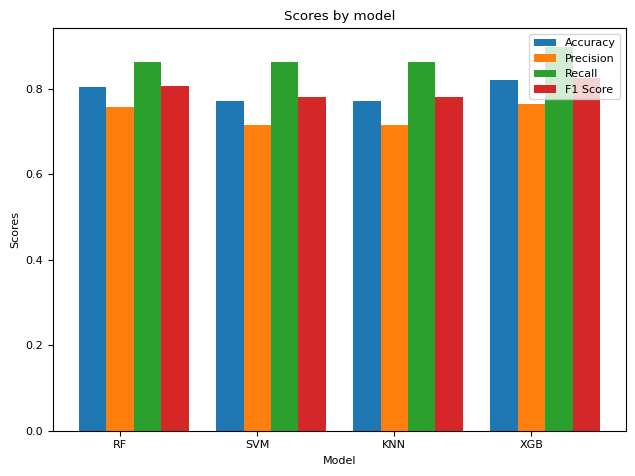

In [ ]:
results = [
    generate_results('RF', y_test, y_pred_rf2),
    generate_results('SVM', y_test, y_pred_svm3),
    generate_results('KNN', y_test, y_pred_knn2),
    generate_results('XGB', y_test, y_pred_xgb3),
]

model_names, accuracies, precisions, recalls, f1_scores = zip(*results)

n_groups = len(model_names)
bar_width = 0.2

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar1 = index
bar2 = [i + bar_width for i in bar1]
bar3 = [i + bar_width for i in bar2]
bar4 = [i + bar_width for i in bar3]

ax.bar(bar1, accuracies, bar_width, label='Accuracy')
ax.bar(bar2, precisions, bar_width, label='Precision')
ax.bar(bar3, recalls, bar_width, label='Recall')
ax.bar(bar4, f1_scores, bar_width, label='F1 Score')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Scores by model')
ax.set_xticks([i + bar_width for i in range(n_groups)])
ax.set_xticklabels(model_names)
ax.legend()

plt.tight_layout()
plt.show()


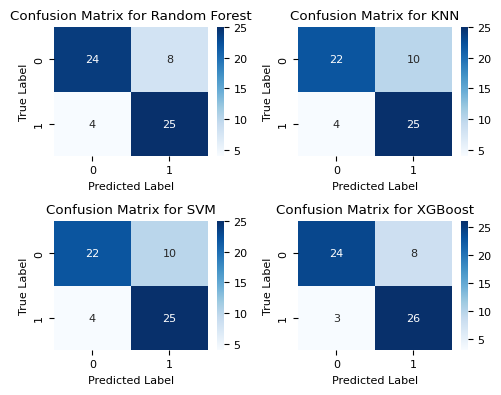

In [ ]:
#@title Confusion Matrix
from sklearn.metrics import confusion_matrix

# Model names and their corresponding predictions
models = {
    'Random Forest': y_pred_rf2,
    'KNN': y_pred_knn2,
    'SVM': y_pred_svm3,
    'XGBoost': y_pred_xgb3
}

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(5, 4))

# Loop through each model and plot confusion matrix
for (name, y_pred), ax in zip(models.items(), axes.flatten()):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

**ALASAN PEMILIHAN CONFUSSION MATRIX**


Confusion matrix adalah salah satu metode yang sangat berguna untuk mengevaluasi kinerja model dalam masalah klasifikasi. Berikut adalah alasan utama untuk memilih confusion matrix dalam evaluasi model:
* Confusion matrix memberikan gambaran komprehensif tentang kinerja model dengan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.
* Confusion matrix memungkinkan kita untuk mengevaluasi kinerja model secara spesifik untuk setiap kelas. Hal ini penting karena dalam beberapa kasus, kesalahan prediksi pada kelas tertentu mungkin lebih kritis daripada yang lain.
* Akurasi saja mungkin tidak memberikan gambaran yang lengkap tentang kinerja model, terutama jika kelas dalam dataset tidak seimbang. Confusion matrix membantu dalam mengidentifikasi kesalahan yang spesifik dan memahami kinerja model dengan lebih baik.

**Confusion Matrix Random Forest**\
matriks konfusi menunjukkan bahwa pengklasifikasi memprediksi dengan benar 25 kejadian kelas 1 dan 24 kejadian kelas 0, dengan total 49 prediksi yang benar. Namun, pengklasifikasi juga salah memperkirakan 8 kejadian kelas 0 sebagai kelas 1, dan 4 kejadian kelas 1 sebagai kelas 0.

**Confusion Matrix KNN**\
matriks konfusi menunjukkan bahwa pengklasifikasi memprediksi dengan benar 27 kejadian kelas 1 dan 22 kejadian kelas 0, dengan total 49 prediksi yang benar. Namun, pengklasifikasi juga salah memperkirakan 10 kejadian kelas 0 sebagai kelas 1, dan 2 kejadian kelas 1 sebagai kelas 0.

**Confusion Matrix SVM**\
matriks konfusi menunjukkan bahwa pengklasifikasi memprediksi dengan benar 24 kejadian kelas 1 dan 22 kejadian kelas 0, dengan total 46 prediksi yang benar. Namun, pengklasifikasi juga salah memperkirakan 10 kejadian kelas 0 sebagai kelas 1, dan 5 kejadian kelas 1 sebagai kelas 0.

**Confusion Matrix XGBoost**\
matriks konfusi menunjukkan bahwa pengklasifikasi memprediksi dengan benar 26 kejadian kelas 1 dan 24 kejadian kelas 0, dengan total 50 prediksi yang benar. Namun, pengklasifikasi juga salah memperkirakan 8 kejadian kelas 0 sebagai kelas 1, dan 3 kejadian kelas 1 sebagai kelas 0.